<div style="text-align:center; background-color:#001F3F; color:white; padding:10px;">
    <h1>Algorithme de détection automatique de
faux billets</h1>
</div>

# Sommaire
* ###  [Etape 1 - Importation des librairies et chargement des fichiers](#importation-librairies)
  * ##### [1.1 - Importation des librairies](#librairies)
  * ##### [1.2 - Chargement du fichier](#fichier)
  
* ###  [Étape 2 - Traitement et Analyse des Données](#traitement)
  * ##### [2.1 - Analyse Descriptive des Données](#analysedescriptive)
    * [2.1.1 - Répartition des Dimensions des Billets](#repartitiondimensions)
    * [2.1.2 - Boxplot des Dimensions des Billets](#boxplotdimension)
    * [2.1.3 - Nombre de Vrais/Faux Billets](#nombrevraisfaux)
    * [2.1.4 - Heatmap des Corrélations](#heatmapcorrelations)
    * [2.1.4 - ACP](#acp)

  * ##### [2.2 - Vérification et Traitement des Valeurs Manquantes](#valeursmanquantes)
    * [2.2.1 - Vérification des Hypothèses de la Régression Linéaire](#hypothesesregressionlineaire)
    * [2.2.2 - Imputation des Valeurs Manquantes](#imputation)
    * [2.2.2 - Comparaison de l'Imputation des Valeurs Manquantes](#comparaisonimputation)
    * [2.2.4 - Analyse de l'imputation](#comparaison)
    
   * ##### [2.3 - ACP](#acp)
       * [2.3.1 - Application de l'ACP](#acpapp)
       * [2.3.2 - Analyse de l'ACP](#acpanalyse)

* ###  [Étape 3 - Préparation des Modèles de Prédiction](#preparation)
  * ##### [3.1 - Préparation des Données](#preparationdonnees)
  * ##### [3.2 - K-means](#kmeans)
    * [3.2.1 - Entraînement du modèle K-means](#kmeansentrainement)
    * [3.2.2 - Test du modèle K-means](#kmeanstest)
    * [3.2.3 - Test du modèle K-means : Analyse des résultats](#analysekmeans)
  * ##### [3.3 - Régression Logistique](#regressionlogistique)
    * [3.2.1 - Entraînement du modèle de Régression logistique](#regentrainement)
    * [3.3.2 - Test du modèle de Régression logistique](#regtest)
    * [3.3.3 - Test du modèle de Régression logistique : Analyse des résultats](#reganalyse)

* ###  [Étape 4 - Évaluation du Modèle](#evaluation)
  * ##### [4.1 - Entraînement et sauvegarde](#entrainement)
  * ##### [4.2 - Chargement et prédiction](#chargement)

* ###  [Étape 5 - Évaluation des Modèles](#evaluation)

# Contexte du projet

L’Organisation nationale de lutte contre le faux-monnayage (ONCFM) est une organisation publique dédiée à la mise en place de méthodes d’identification des contrefaçons des billets en euros. Dans le cadre de cette lutte, l'ONCFM souhaite développer un algorithme capable de différencier automatiquement les vrais billets des faux.

# Objectifs

Lorsqu’un billet arrive, une machine consigne l’ensemble de ses caractéristiques géométriques. À travers nos années de lutte contre le faux-monnayage, nous avons observé que les dimensions des vrais billets diffèrent légèrement de celles des faux. Ces différences sont difficilement détectables à l’œil nu, mais une machine devrait être capable de les différencier sans problème.

L'objectif est donc de construire un algorithme qui, à partir des caractéristiques géométriques d’un billet, puisse déterminer s'il s'agit d'un vrai ou d'un faux billet.


<div id="importation-librairies" style="border: 2px solid #001F3F; background-color: #77B5FE; padding: 10px; text-align: center;">
    <h2 style="font-weight: bold; color: #001F3F;">Etape 1 - Importation des librairies et chargement des fichiers</h2>
</div>

<div id="librairies" style="border-left: 5px solid #0074CC; padding-left: 10px;">
    <h3 style="font-weight: bold; color: #ED0010;">1.1 - Importation des librairies</h3>
</div>
<hr style="border: 1px solid #0074CC;">


In [1]:
#Importation des librairies
import pandas as pd
import random
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from datetime import datetime, timedelta
import locale
import numpy as np
import scipy.stats as stats
import seaborn as sns
import plotly.express as px
from plotly.io import write_image
from scipy.stats import chi2_contingency
from scipy.stats import f_oneway
import plotly.graph_objects as go
import warnings
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import QuantileTransformer
from matplotlib.collections import LineCollection
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from IPython.display import display
from sklearn.metrics import silhouette_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import ConfusionMatrixDisplay, classification_report
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.exceptions import ConvergenceWarning
warnings.filterwarnings("ignore", category=ConvergenceWarning)
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from scipy.stats import uniform, randint
import joblib
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report, accuracy_score, precision_score, recall_score
import pickle
from sklearn.metrics import r2_score

<div id="fichier" style="border-left: 5px solid #0074CC; padding-left: 10px;">
    <h3 style="font-weight: bold; color: #ED0010;">1.2 - Chargement du fichier</h3>
</div>
<hr style="border: 1px solid #0074CC;">

In [2]:
#Importation du fichier
billets = pd.read_csv('/Users/Bouboule/Documents/Projet 10/billets.csv', sep=';')
billets.info()
billets.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   is_genuine    1500 non-null   bool   
 1   diagonal      1500 non-null   float64
 2   height_left   1500 non-null   float64
 3   height_right  1500 non-null   float64
 4   margin_low    1463 non-null   float64
 5   margin_up     1500 non-null   float64
 6   length        1500 non-null   float64
dtypes: bool(1), float64(6)
memory usage: 71.9 KB


,is_genuine,diagonal,height_left,height_right,margin_low,margin_up,length
0,True,171.81,104.86,104.95,4.52,2.89,112.83
1,True,171.46,103.36,103.66,3.77,2.99,113.09
2,True,172.69,104.48,103.50,4.40,2.94,113.16
3,True,171.36,103.91,103.94,3.62,3.01,113.51
4,True,171.73,104.28,103.46,4.04,3.48,112.54


<div id="traitement" style="border: 2px solid #001F3F; background-color: #77B5FE; padding: 10px; text-align: center;">
    <h2 style="font-weight: bold; color: #001F3F;">Étape 2 - Traitement et Analyse des Données</h2>
</div>

<div id="analysedescriptive" style="border-left: 5px solid #0074CC; padding-left: 10px;">
    <h3 style="font-weight: bold; color: #ED0010;">2.1 - Analyse Descriptive des Données</h3>
</div>
<hr style="border: 1px solid #0074CC;">

<h4 id="repartitiondimensions" style="border-left: 5px solid #0074CC; font-weight: bold; color: #0060A8; padding-left: 10px;">2.1.1 - Répartition des Dimensions des Billets</h4>
<hr style="border: 1px solid #0074CC;">

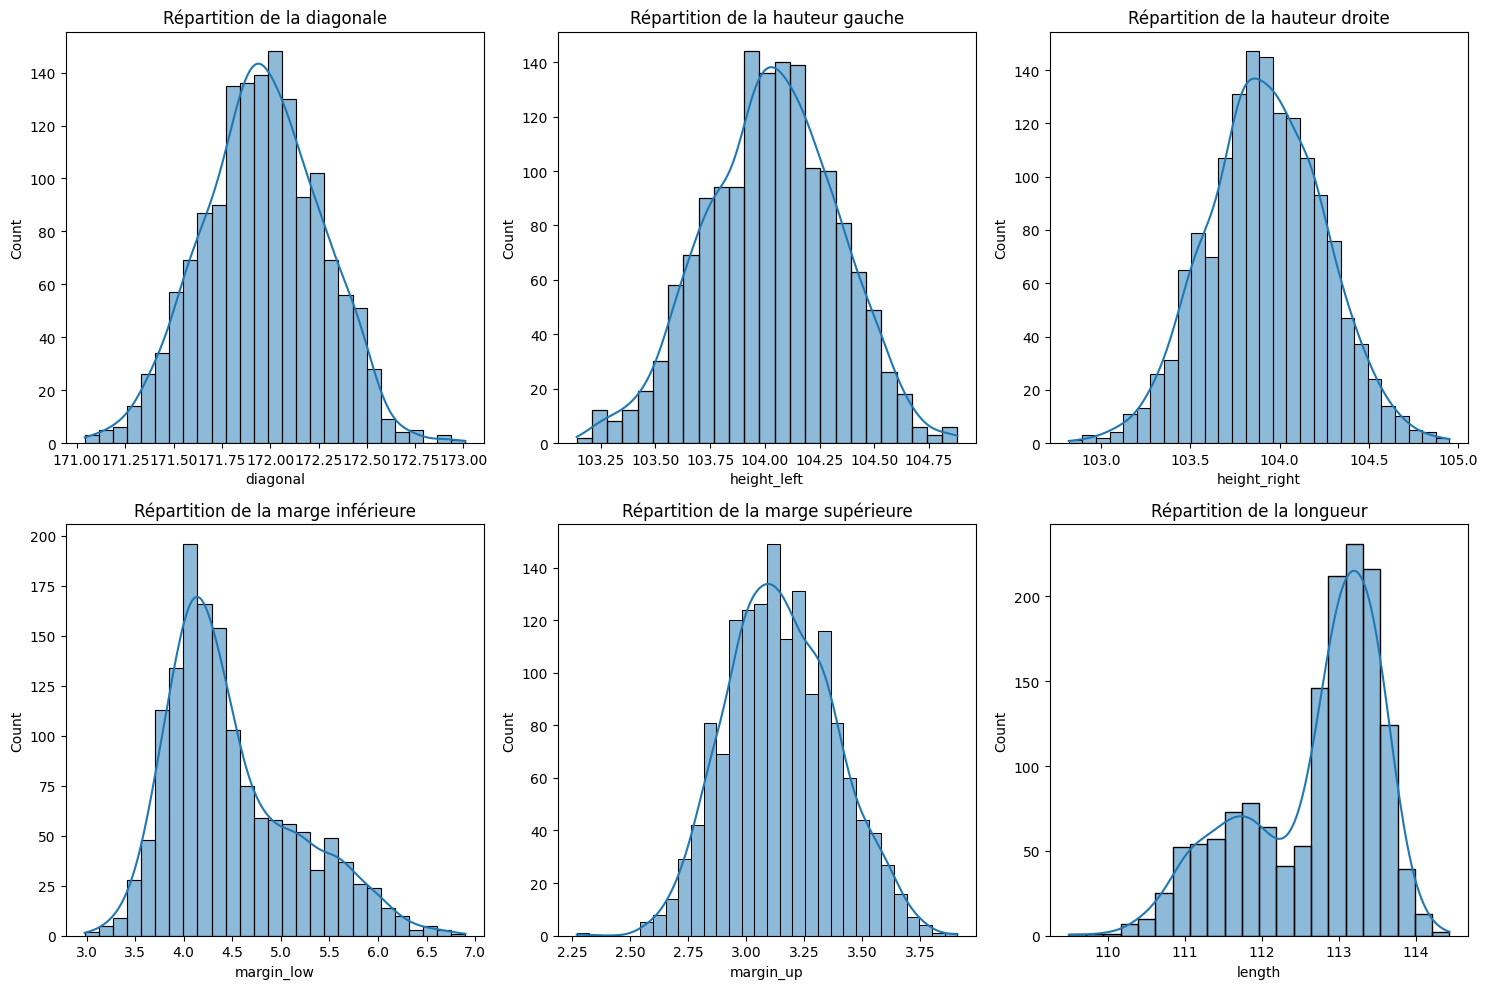

In [3]:
# Répartition des dimensions des billets
plt.figure(figsize=(15, 10))
plt.subplot(2, 3, 1)
sns.histplot(billets['diagonal'], kde=True)
plt.title('Répartition de la diagonale')

plt.subplot(2, 3, 2)
sns.histplot(billets['height_left'], kde=True)
plt.title('Répartition de la hauteur gauche')

plt.subplot(2, 3, 3)
sns.histplot(billets['height_right'], kde=True)
plt.title('Répartition de la hauteur droite')

plt.subplot(2, 3, 4)
sns.histplot(billets['margin_low'], kde=True)
plt.title('Répartition de la marge inférieure')

plt.subplot(2, 3, 5)
sns.histplot(billets['margin_up'], kde=True)
plt.title('Répartition de la marge supérieure')

plt.subplot(2, 3, 6)
sns.histplot(billets['length'], kde=True)
plt.title('Répartition de la longueur')

plt.tight_layout()
plt.show()

### Analyse de la répartition des dimensions des billets :

* Les histogrammes montrent la distribution des différentes dimensions des billets.
* La plupart des distributions sont approximativement normales, avec quelques variations.
* `margin_low` montre une distribution légèrement bimodale, ce qui peut indiquer des différences distinctes entre les vrais et faux billets.
* Les autres variables suivent des distributions normales, indiquant une cohérence dans les mesures des dimensions.

<h4 id="boxplotdimension" style="border-left: 5px solid #0074CC; font-weight: bold; color: #0060A8; padding-left: 10px;">2.1.2 - Boxplot des Dimensions des Billets</h4>
<hr style="border: 1px solid #0074CC;">

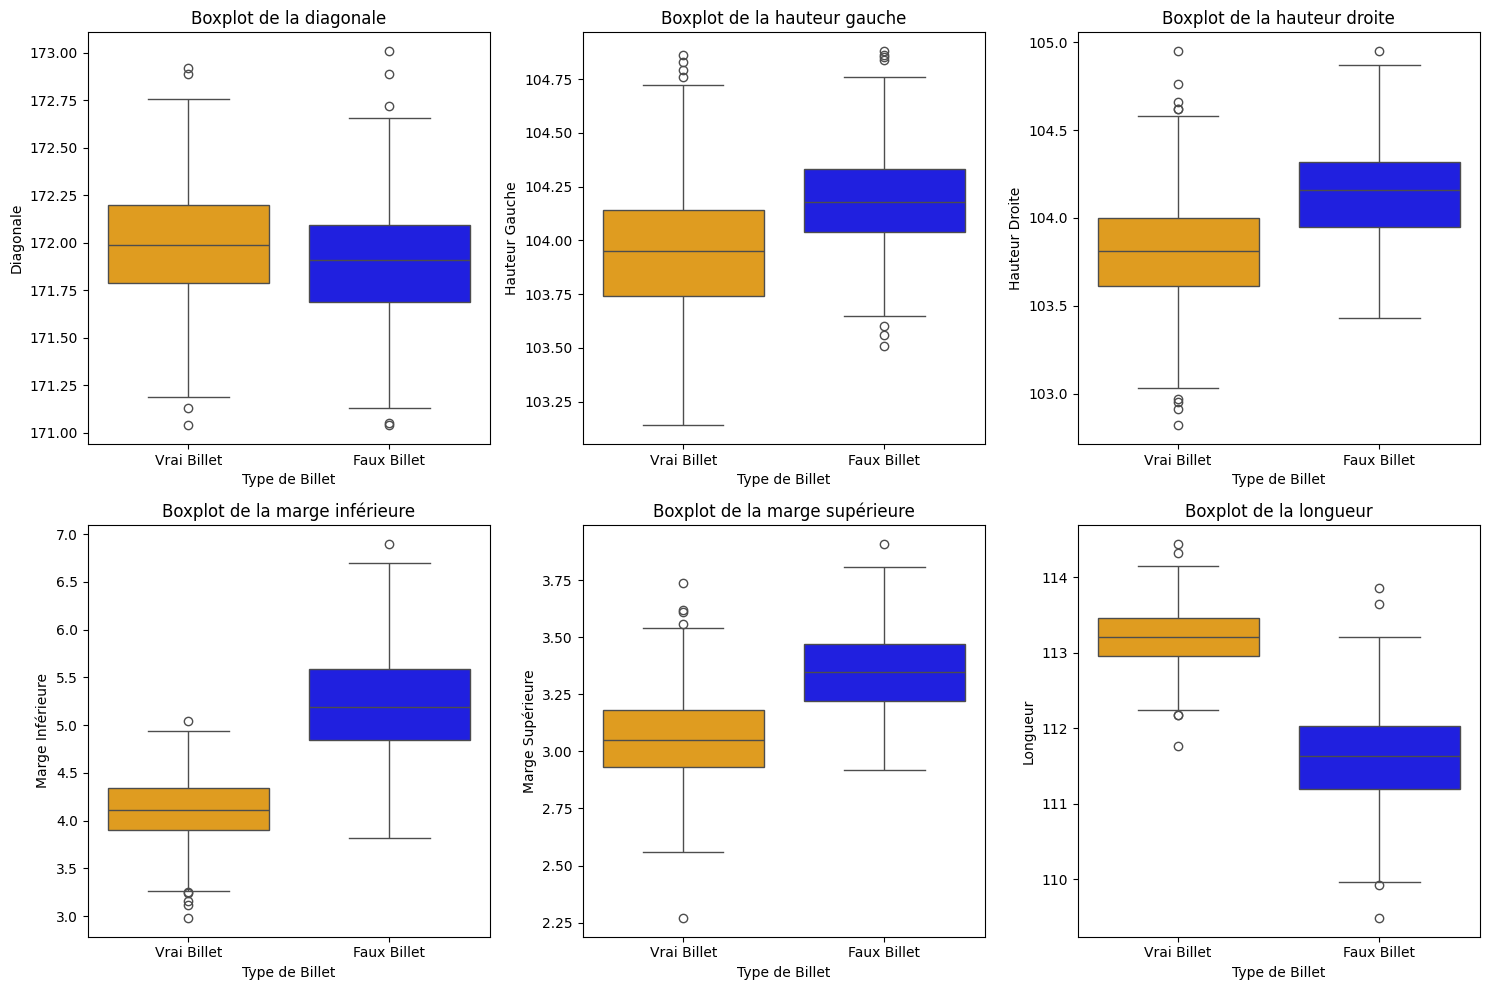

In [4]:
# Définir une palette de couleurs
palette = {"Vrai Billet": "orange", "Faux Billet": "blue"}

# Remplacer les valeurs de 'is_genuine' pour plus de lisibilité
billets['is_genuine'] = billets['is_genuine'].replace({True: 'Vrai Billet', False: 'Faux Billet'})

# Boxplots des dimensions des billets avec fond transparent
plt.figure(figsize=(15, 10), facecolor='none')

plt.subplot(2, 3, 1)
sns.boxplot(x='is_genuine', y='diagonal', data=billets, hue='is_genuine', palette=palette, dodge=False)
plt.title('Boxplot de la diagonale')
plt.xlabel('Type de Billet')
plt.ylabel('Diagonale')

plt.subplot(2, 3, 2)
sns.boxplot(x='is_genuine', y='height_left', data=billets, hue='is_genuine', palette=palette, dodge=False)
plt.title('Boxplot de la hauteur gauche')
plt.xlabel('Type de Billet')
plt.ylabel('Hauteur Gauche')

plt.subplot(2, 3, 3)
sns.boxplot(x='is_genuine', y='height_right', data=billets, hue='is_genuine', palette=palette, dodge=False)
plt.title('Boxplot de la hauteur droite')
plt.xlabel('Type de Billet')
plt.ylabel('Hauteur Droite')

plt.subplot(2, 3, 4)
sns.boxplot(x='is_genuine', y='margin_low', data=billets, hue='is_genuine', palette=palette, dodge=False)
plt.title('Boxplot de la marge inférieure')
plt.xlabel('Type de Billet')
plt.ylabel('Marge Inférieure')

plt.subplot(2, 3, 5)
sns.boxplot(x='is_genuine', y='margin_up', data=billets, hue='is_genuine', palette=palette, dodge=False)
plt.title('Boxplot de la marge supérieure')
plt.xlabel('Type de Billet')
plt.ylabel('Marge Supérieure')

plt.subplot(2, 3, 6)
sns.boxplot(x='is_genuine', y='length', data=billets, hue='is_genuine', palette=palette, dodge=False)
plt.title('Boxplot de la longueur')
plt.xlabel('Type de Billet')
plt.ylabel('Longueur')

plt.tight_layout()
plt.show()


### Analyse des boxplots des dimensions des billets :

Les boxplots montrent que la distribution de certaines dimensions diffère entre les vrais et les faux billets.
* `height_left` et height_right sont légèrement plus élevés pour les billets faux.
* `margin_low` est généralement plus faible pour les billets vrais.
* `length` est plus élevé pour les billets vrais, avec une distinction claire par rapport aux faux billets.

<h4 id="nombrevraisfaux" style="border-left: 5px solid #0074CC; font-weight: bold; color: #0060A8; padding-left: 10px;">2.1.3 - Nombre de Vrais/Faux Billets</h4>
<hr style="border: 1px solid #0074CC;">

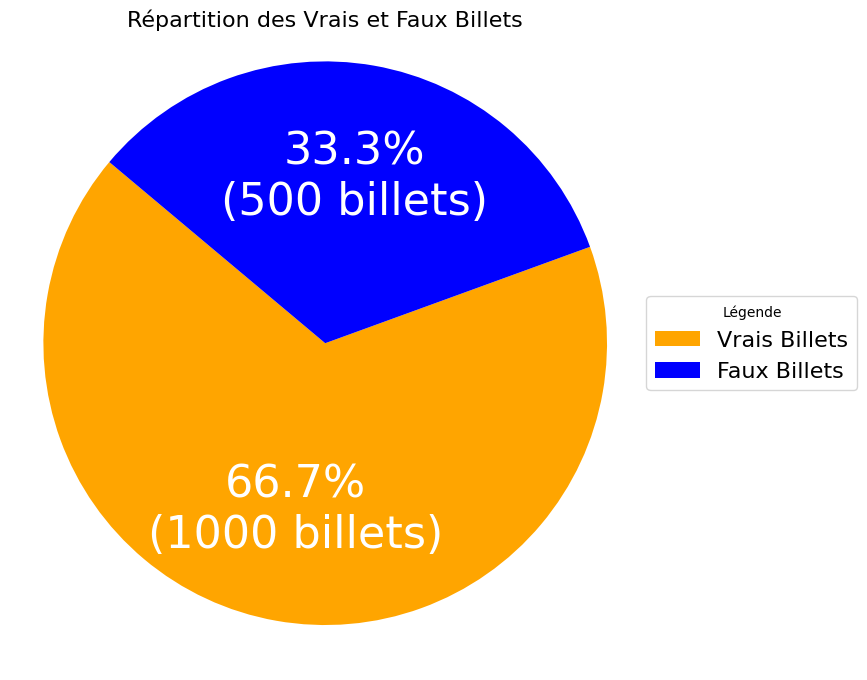

In [5]:
# Comptage des vrais et faux billets
nb_vrai_faux = billets['is_genuine'].value_counts()
labels = ['Vrais Billets', 'Faux Billets']
colors = ['orange', 'blue']

# Fonction pour ajouter les annotations avec nombre de billets et pourcentage
def func(pct, allvals):
    absolute = int(pct / 100. * sum(allvals))
    return "{:.1f}%\n({:d} billets)".format(pct, absolute)

# Tracé du camembert
plt.figure(figsize=(8, 8))
wedges, texts, autotexts = plt.pie(nb_vrai_faux, labels=labels, colors=colors, autopct=lambda pct: func(pct, nb_vrai_faux), startangle=140)

# Personnalisation des textes
for text in texts:
    text.set_color('white')
    text.set_fontsize(32)
for autotext in autotexts:
    autotext.set_color('white')
    autotext.set_fontsize(32)

plt.title('Répartition des Vrais et Faux Billets', fontsize=16)
plt.axis('equal')  # Assure que le graphique est un cercle.

# Ajout de la légende avec une taille de police agrandie
plt.legend(wedges, labels, title="Légende", loc="center left", bbox_to_anchor=(1, 0, 0.5, 1), prop={'size': 16})

plt.show()

<h4 id="heatmapcorrelations" style="border-left: 5px solid #0074CC; font-weight: bold; color: #0060A8; padding-left: 10px;">2.1.4 - Heatmap des Corrélations</h4>
<hr style="border: 1px solid #0074CC;">

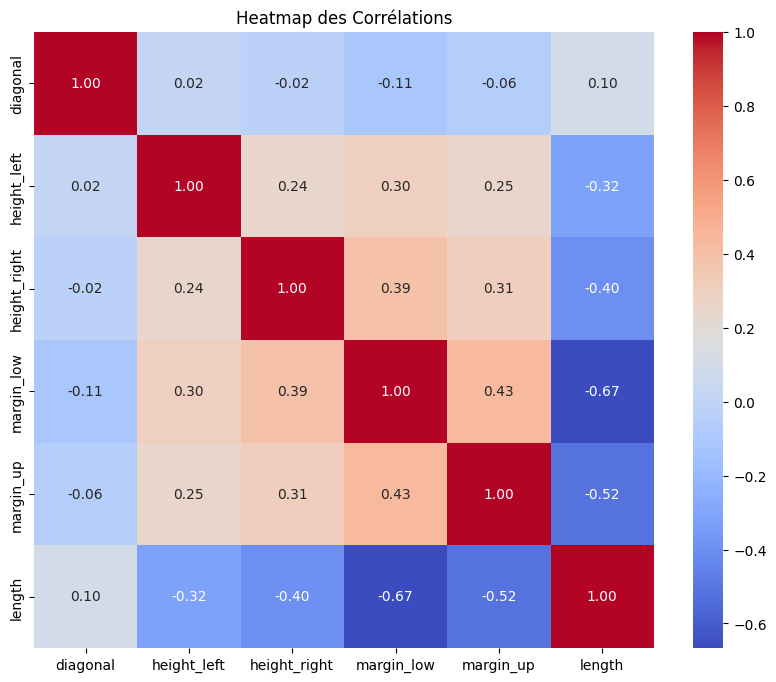

In [6]:
# Calcul des corrélations après imputation
df_quanti_after = billets[['diagonal', 'height_left', 'height_right', 'margin_low', 'margin_up', 'length']]
corr_after = df_quanti_after.corr()

# Visualisation de la heatmap des corrélations avec fond transparent
plt.figure(figsize=(10, 8), facecolor='none')
sns.heatmap(corr_after, annot=True, fmt=".2f", cmap="coolwarm")
plt.title('Heatmap des Corrélations')
plt.show()

### Analyse de la heatmap :

La heatmap montre les corrélations entre les différentes dimensions des billets.

On observe une forte corrélation négative entre length et margin_low (-0.67) et une corrélation positive entre `height_left` et `margin_low` (0.39).
Les autres corrélations sont relativement faibles, indiquant des relations moins significatives entre ces variables.

<h2 style="color:red ; font-weight: bold">Conclusion de l'analyse </h2></span>

Les analyses descriptives initiales révèlent des différences significatives entre les billets vrais et faux dans plusieurs dimensions.

* La`length`et `margin_low` sont des indicateurs potentiellement forts pour distinguer les vrais et faux billets, en raison de leurs différences claires dans les distributions et corrélations.
* La heatmap des corrélations et les boxplots montrent des relations et des différences distinctes entre les dimensions des billets vrais et faux, fournissant des informations utiles pour la modélisation prédictive.

Ces analyses préliminaires sont essentielles pour guider l'imputation des valeurs manquantes et la construction de modèles prédictifs fiables.

<div id="valeursmanquantes" style="border-left: 5px solid #0074CC; padding-left: 10px;">
    <h3 style="font-weight: bold; color: #ED0010;">2.2 - Vérification et Traitement des Valeurs Manquantes</h3>
</div>
<hr style="border: 1px solid #0074CC;">

In [7]:
# Remplacer les valeurs de 'is_genuine' pour plus de lisibilité
billets['is_genuine'] = billets['is_genuine'].replace({True: 'Vrai Billet', False: 'Faux Billet'})

# Vérification des valeurs manquantes
print("Nombre de valeurs manquantes par colonne :")
print(billets.isnull().sum())

# Séparation des données avec et sans valeurs manquantes
train_data = billets.dropna(subset=['margin_low']).copy()
missing_data = billets[billets['margin_low'].isnull()].copy()

# Encodage des valeurs 'is_genuine' en numériques pour la régression linéaire
train_data['is_genuine_num'] = train_data['is_genuine'].replace({'Vrai Billet': 1, 'Faux Billet': 0})
missing_data['is_genuine_num'] = missing_data['is_genuine'].replace({'Vrai Billet': 1, 'Faux Billet': 0})

# Séparation des caractéristiques et de la cible pour l'entraînement
X_train = train_data.drop(['margin_low', 'is_genuine'], axis=1)
y_train = train_data['margin_low']

Nombre de valeurs manquantes par colonne :
is_genuine       0
diagonal         0
height_left      0
height_right     0
margin_low      37
margin_up        0
length           0
dtype: int64


<h4 id="hypothesesregressionlineaire" style="border-left: 5px solid #0074CC; font-weight: bold; color: #0060A8; padding-left: 10px;">2.2.1 - Vérification des Hypothèses de la Régression Linéaire</h4>
<hr style="border: 1px solid #0074CC;">

Avant d'imputer les valeurs manquantes de `margin_low` par régression linéaire, nous vérifions trois hypothèses clés:

* la linéarité des relations entre les variables
* la normalité des résidus du modèle
* l'homoscédasticité (variance constante des résidus)

Ces vérifications garantissent que la régression linéaire est une méthode appropriée et que les valeurs imputées seront fiables.

<h4 id="linearite" style=" font-weight: bold; color: #0060A8; padding-left: 10px;">Linéarité</h4>
<hr style="border: 1px solid #0074CC;">

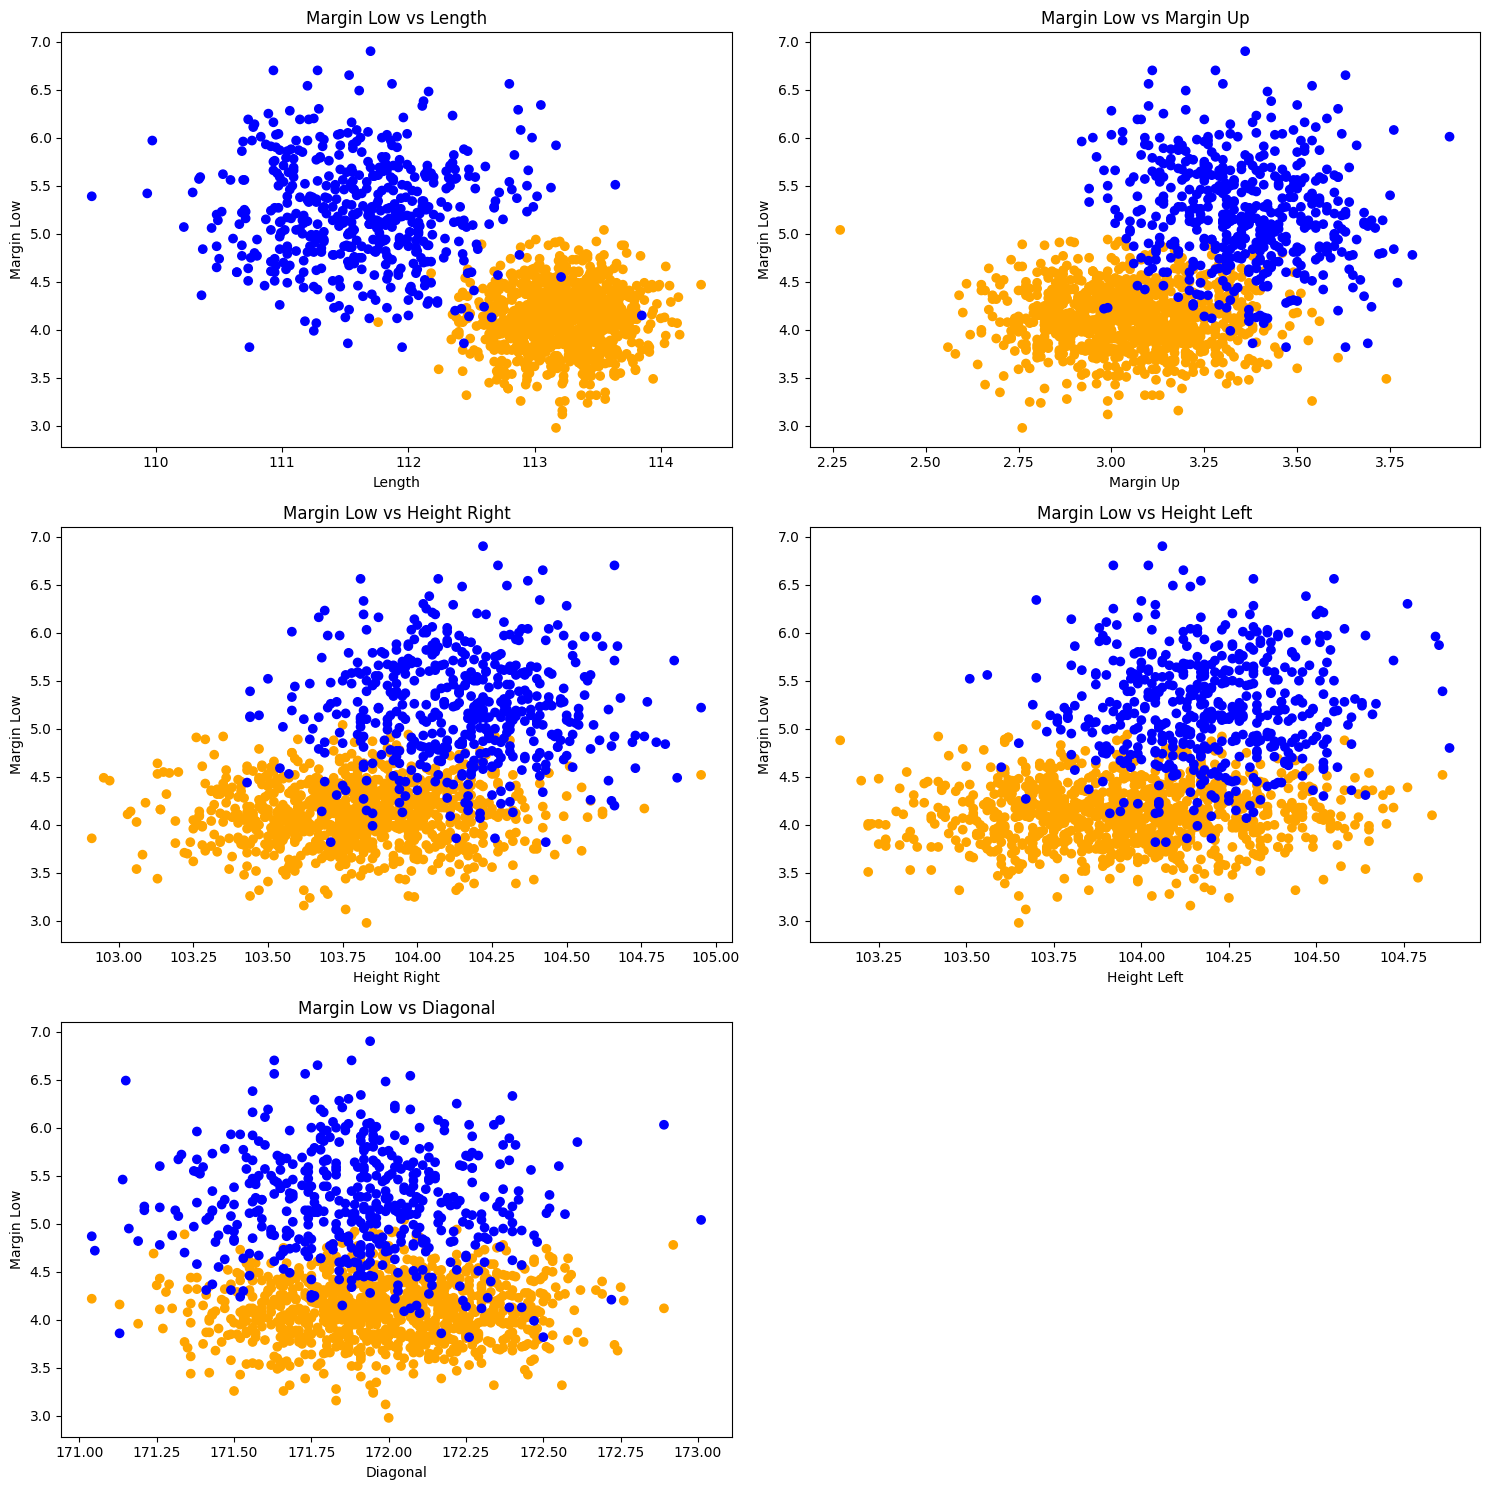

In [8]:
# Remplacer les valeurs de 'is_genuine' par des labels
billets['is_genuine_label'] = billets['is_genuine'].replace({True: 'Vrai Billet', False: 'Faux Billet'})

# Créer les graphiques de dispersion avec un fond transparent
fig, axs = plt.subplots(3, 2, figsize=(15, 15), facecolor='none')

# Définir les couleurs en fonction de la variable 'is_genuine_label'
colors = billets['is_genuine_label'].map({'Vrai Billet': 'orange', 'Faux Billet': 'blue'})

# Relation entre margin_low et length
axs[0, 0].scatter(billets['length'], billets['margin_low'], c=colors)
axs[0, 0].set_xlabel('Length')
axs[0, 0].set_ylabel('Margin Low')
axs[0, 0].set_title('Margin Low vs Length')

# Relation entre margin_low et margin_up
axs[0, 1].scatter(billets['margin_up'], billets['margin_low'], c=colors)
axs[0, 1].set_xlabel('Margin Up')
axs[0, 1].set_ylabel('Margin Low')
axs[0, 1].set_title('Margin Low vs Margin Up')

# Relation entre margin_low et height_right
axs[1, 0].scatter(billets['height_right'], billets['margin_low'], c=colors)
axs[1, 0].set_xlabel('Height Right')
axs[1, 0].set_ylabel('Margin Low')
axs[1, 0].set_title('Margin Low vs Height Right')

# Relation entre margin_low et height_left
axs[1, 1].scatter(billets['height_left'], billets['margin_low'], c=colors)
axs[1, 1].set_xlabel('Height Left')
axs[1, 1].set_ylabel('Margin Low')
axs[1, 1].set_title('Margin Low vs Height Left')

# Relation entre margin_low et diagonal
axs[2, 0].scatter(billets['diagonal'], billets['margin_low'], c=colors)
axs[2, 0].set_xlabel('Diagonal')
axs[2, 0].set_ylabel('Margin Low')
axs[2, 0].set_title('Margin Low vs Diagonal')

# Enlever le dernier sous-graphe vide
fig.delaxes(axs[2, 1])

# Ajuster la disposition
plt.tight_layout()
plt.show()


### Analyse de la linéarité:

Parmi toutes les variables analysées, `length` montre la seule relation linéaire significative avec `margin_low`. 

Cette conclusion est soutenue par le coefficient de corrélation de 0.67, indiquant une corrélation positive modérée à forte. Les autres variables (`margin_up`, `height_right`,`height_left`, `diagonal`) ne montrent pas de relations linéaires fortes avec margin_low, ce qui suggère que `length` serait la variable la plus appropriée pour une régression linéaire visant à imputer ou prédire les valeurs manquantes de `margin_low.

<h4 id="linearite" style=" font-weight: bold; color: #0060A8; padding-left: 10px;">Normalité des Résidus</h4>
<hr style="border: 1px solid #0074CC;">

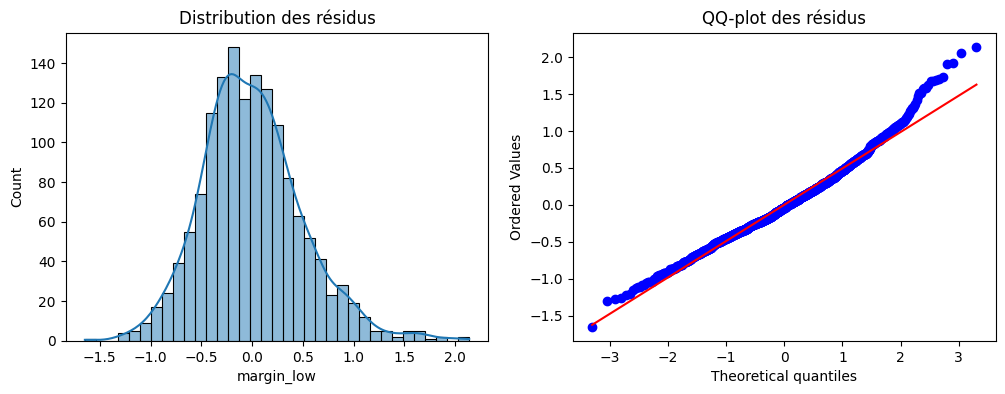

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
import scipy.stats as stats

# Filtrer les données pour exclure les valeurs manquantes
billets_non_na = billets.dropna(subset=['margin_low'])

# Définir les variables indépendantes et dépendantes
X = billets_non_na[['length']]
y = billets_non_na['margin_low']

# Entraînement du modèle de régression linéaire
model = LinearRegression()
model.fit(X, y)

# Calcul des résidus
residuals = y - model.predict(X)

# Visualisation des résidus avec un fond transparent
fig, axes = plt.subplots(1, 2, figsize=(12, 4), facecolor='none')

# Histogramme des résidus
sns.histplot(residuals, kde=True, ax=axes[0])
axes[0].set_title('Distribution des résidus')

# QQ-plot des résidus
stats.probplot(residuals, dist="norm", plot=axes[1])
axes[1].set_title('QQ-plot des résidus')

# Ajuster les paramètres pour fond transparent
fig.patch.set_alpha(0.0)
for ax in axes:
    ax.patch.set_alpha(0.0)

plt.show()


### Analyse de la normalité des résidus:
L'histogramme et le QQ-plot des résidus permettent de vérifier si les résidus suivent une distribution normale. 

<span style="color:red">Histogramme des Résidus</span>: La forme de la courbe ressemble à une cloche, ce qui est typique d'une distribution normale. Cela signifie que les erreurs du modèle sont réparties de manière équilibrée autour de zéro.

<span style="color:red">QQ-plot des Résidus</span> : Les résidus suivent globalement la ligne diagonale, indiquant une normalité approximative.


<h4 id="Homoscédasticité" style=" font-weight: bold; color: #0060A8; padding-left: 10px;">Homoscédasticité</h4>
<hr style="border: 1px solid #0074CC;">

/var/folders/mj/35lwrtk904vb1m5rkhflm60w0000gp/T/ipykernel_86123/1914454587.py:19: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/var/folders/mj/35lwrtk904vb1m5rkhflm60w0000gp/T/ipykernel_86123/1914454587.py:20: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/var/folders/mj/35lwrtk904vb1m5rkhflm60w0000gp/T/ipykernel_86123/1914454587.py:21: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in th

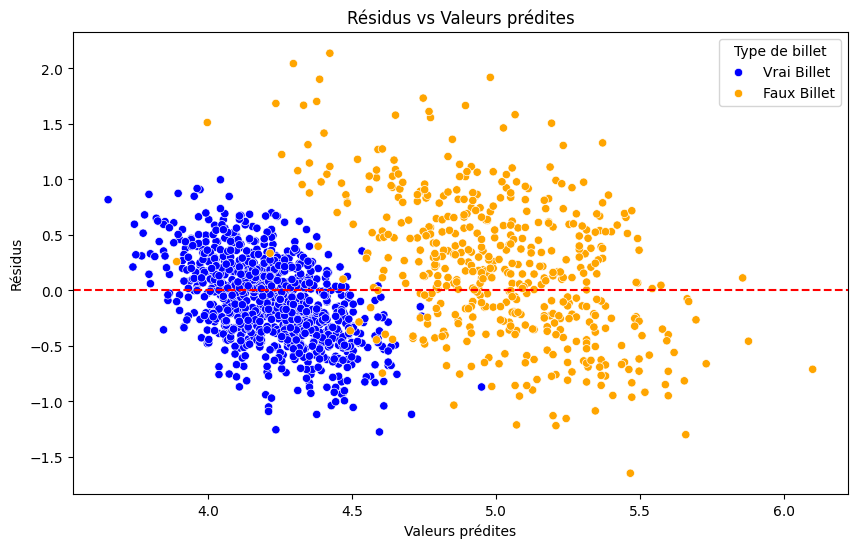

In [10]:
# Remplacer les valeurs de 'is_genuine' pour plus de lisibilité
billets['is_genuine_label'] = billets['is_genuine'].replace({True: 'Vrai Billet', False: 'Faux Billet'})

# Filtrer les données pour exclure les valeurs manquantes
billets_non_na = billets.dropna(subset=['margin_low'])

# Définir les variables indépendantes et dépendantes
X = billets_non_na[['length']]
y = billets_non_na['margin_low']

# Entraînement du modèle de régression linéaire
model = LinearRegression()
model.fit(X, y)

# Calcul des résidus
residuals = y - model.predict(X)

# Ajout des valeurs prédites au DataFrame
billets_non_na['predictions'] = model.predict(X)
billets_non_na['residuals'] = residuals
billets_non_na['is_genuine_label'] = billets_non_na['is_genuine'].replace({True: 'Vrai Billet', False: 'Faux Billet'})

# Graphique des résidus vs valeurs prédites avec différenciation des vrais et faux billets
fig, ax = plt.subplots(figsize=(10, 6), facecolor='none')
sns.scatterplot(x='predictions', y='residuals', hue='is_genuine_label', 
                palette={'Vrai Billet': 'blue', 'Faux Billet': 'orange'}, 
                data=billets_non_na, ax=ax)
ax.axhline(y=0, color='r', linestyle='--')
ax.set_xlabel('Valeurs prédites')
ax.set_ylabel('Résidus')
ax.set_title('Résidus vs Valeurs prédites')
ax.legend(title='Type de billet')

# Ajuster les paramètres pour fond transparent
fig.patch.set_alpha(0.0)
ax.patch.set_alpha(0.0)

plt.show()

### Analyse de l'homoscédasticité:
Le graphique des résidus vs valeurs prédites permet de vérifier si la variance des résidus est constante sur toute la plage des valeurs prédites. 

<span style="color:red">Homoscédasticité</span> : Les vrais billets (en bleu) et les faux billets (en orange) montrent une dispersion similaire autour de la ligne de résidus nulle.
Les résidus ne montrent pas de motifs discernables, mais il y a une certaine dispersion horizontale qui pourrait indiquer une légère hétéroscédasticité.

<span style="color:red">Conclusion</span> 

L'absence de motifs discernables indique qu'il n'y a pas de violation majeure de l'hypothèse d'homoscédasticité.

### Conclusion de l'Analyse

1. **Linéarité** : La relations est suffisamment linéaire entre `margin_low` et `lenght`  pour justifier l'utilisation de la régression linéaire.
2. **Normalité des Résidus** : Les résidus sont approximativement normaux, avec quelques écarts mineurs.
3. **Homoscédasticité** : Les résidus sont uniformément dispersés, indiquant une homoscédasticité.

Ces résultats nous permettent de conclure que l'utilisation de la régression linéaire pour imputer les valeurs manquantes de `margin_low` est justifiée.

**Remarque** : Même si les hypothèses ne sont pas parfaitement respectées, la régression linéaire peut encore être un outil utile pour l'imputation. L'important est que les déviations par rapport aux hypothèses ne soient pas trop importantes et n'affectent pas significativement les résultats.

<h4 id="imputation" style="border-left: 5px solid #0074CC; font-weight: bold; color: #0060A8; padding-left: 10px;">2.2.2 - Imputation des Valeurs Manquantes</h4>
<hr style="border: 1px solid #0074CC;">

In [11]:
billets_original = billets.copy()

# Traiter les valeurs manquantes dans 'length' avant l'imputation
billets['length'].fillna(billets['length'].mean(), inplace=True)

# Création d'un dataset pour les valeurs manquantes
missing_data = billets[billets['margin_low'].isnull()].copy()

# Imputation en utilisant une seule variable (length)
X_single = missing_data[['length']]
y_single = billets.dropna(subset=['margin_low'])[['margin_low']]

# Entraînement du modèle de régression linéaire
model_single = LinearRegression()
model_single.fit(billets.dropna(subset=['margin_low'])[['length']], y_single)

# Prédiction des valeurs manquantes
missing_data['margin_low'] = model_single.predict(X_single)

# Sauvegarder les valeurs imputées
imputed_values = missing_data.copy()

# Remplacement des valeurs manquantes dans le dataset original
billets.loc[billets['margin_low'].isnull(), 'margin_low'] = missing_data['margin_low']

# Séparer les données originales et imputées pour le graphique
original_data = billets.loc[~billets.index.isin(missing_data.index)]
imputed_data = billets.loc[billets.index.isin(missing_data.index)]

# Vérification des valeurs manquantes après imputation
print("\nNombre de valeurs manquantes après imputation :")
print(billets.isnull().sum())


Nombre de valeurs manquantes après imputation :
is_genuine          0
diagonal            0
height_left         0
height_right        0
margin_low          0
margin_up           0
length              0
is_genuine_label    0
dtype: int64


In [12]:
# Calcul de R^2
# Utiliser les données non manquantes pour calculer R^2
X = billets.dropna(subset=['margin_low'])[['length']]
y = billets.dropna(subset=['margin_low'])['margin_low']
y_pred = model_single.predict(X)

# Calcul de R^2
r2 = r2_score(y, y_pred)
print(f"R^2: {r2}")

R^2: 0.4504599479240021


In [13]:
# Traiter les valeurs manquantes dans 'length' avant l'imputation
billets_original['length'].fillna(billets_original['length'].mean(), inplace=True)

# Séparer les données avec et sans valeurs manquantes dans 'margin_low'
complete_data_all_vars = billets_original.dropna(subset=['margin_low'])
missing_data_all_vars = billets_original[billets_original['margin_low'].isnull()]

# Sélectionner toutes les variables pour l'imputation, sauf les colonnes non numériques
X_all_vars = complete_data_all_vars.drop(columns=['margin_low', 'is_genuine', 'is_genuine_label'])
y_all_vars = complete_data_all_vars['margin_low']

# Entraînement du modèle de régression linéaire avec toutes les variables
model_all_vars = LinearRegression()
model_all_vars.fit(X_all_vars, y_all_vars)

# Prédiction des valeurs manquantes en utilisant toutes les variables
X_missing_all_vars = missing_data_all_vars.drop(columns=['margin_low', 'is_genuine', 'is_genuine_label'])
missing_data_all_vars['margin_low'] = model_all_vars.predict(X_missing_all_vars)

# Sauvegarder les valeurs imputées avec toutes les variables
imputed_values_all_vars = missing_data_all_vars.copy()

# Remplacement des valeurs manquantes dans le dataset original avec les valeurs imputées avec toutes les variables
billets_all_vars = billets_original.copy()
billets_all_vars.loc[billets_all_vars['margin_low'].isnull(), 'margin_low'] = missing_data_all_vars['margin_low']

# Vérification des valeurs manquantes après imputation avec toutes les variables
print("\nNombre de valeurs manquantes après imputation avec toutes les variables :")
print(billets_all_vars.isnull().sum())


Nombre de valeurs manquantes après imputation avec toutes les variables :
is_genuine          0
diagonal            0
height_left         0
height_right        0
margin_low          0
margin_up           0
length              0
is_genuine_label    0
dtype: int64


/var/folders/mj/35lwrtk904vb1m5rkhflm60w0000gp/T/ipykernel_86123/129645577.py:18: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



<h4 id="comparaisonimputation" style="border-left: 5px solid #0074CC; font-weight: bold; color: #0060A8; padding-left: 10px;">2.2.2 - Comparaison de l'Imputation des Valeurs Manquantes</h4>
<hr style="border: 1px solid #0074CC;">

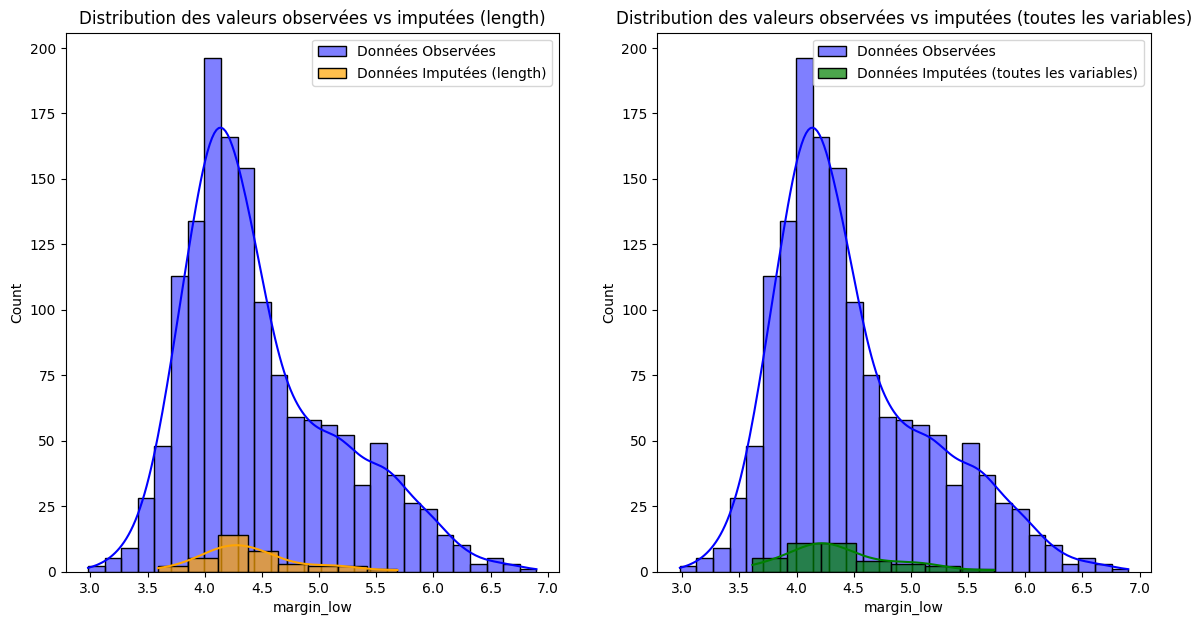


Statistiques descriptives des données observées:
count    1463.000000
mean        4.485967
std         0.663813
min         2.980000
25%         4.015000
50%         4.310000
75%         4.870000
max         6.900000
Name: margin_low, dtype: float64

Statistiques descriptives des données imputées (length):
count    37.000000
mean      4.409062
std       0.431533
min       3.591241
25%       4.143715
50%       4.346458
75%       4.620161
max       5.684562
Name: margin_low, dtype: float64

Statistiques descriptives des données imputées (toutes les variables):
count    37.000000
mean      4.384945
std       0.460719
min       3.614306
25%       4.127442
50%       4.298047
75%       4.650617
max       5.726993
Name: margin_low, dtype: float64


In [14]:
# Comparaison visuelle des distributions
plt.figure(figsize=(14, 7))

# Distribution des valeurs observées
plt.subplot(1, 2, 1)
sns.histplot(billets_original['margin_low'], kde=True, color='blue', label='Données Observées')
sns.histplot(imputed_values['margin_low'], kde=True, color='orange', label='Données Imputées (length)', alpha=0.7)
plt.title('Distribution des valeurs observées vs imputées (length)')
plt.xlabel('margin_low')
plt.legend()

plt.subplot(1, 2, 2)
sns.histplot(billets_original['margin_low'], kde=True, color='blue', label='Données Observées')
sns.histplot(imputed_values_all_vars['margin_low'], kde=True, color='green', label='Données Imputées (toutes les variables)', alpha=0.7)
plt.title('Distribution des valeurs observées vs imputées (toutes les variables)')
plt.xlabel('margin_low')
plt.legend()

plt.show()

# Calcul des statistiques descriptives
stats_observed = billets_original['margin_low'].describe()
stats_imputed_length = imputed_values['margin_low'].describe()
stats_imputed_all_vars = imputed_values_all_vars['margin_low'].describe()

# Affichage des statistiques descriptives
print("\nStatistiques descriptives des données observées:")
print(stats_observed)

print("\nStatistiques descriptives des données imputées (length):")
print(stats_imputed_length)

print("\nStatistiques descriptives des données imputées (toutes les variables):")
print(stats_imputed_all_vars)


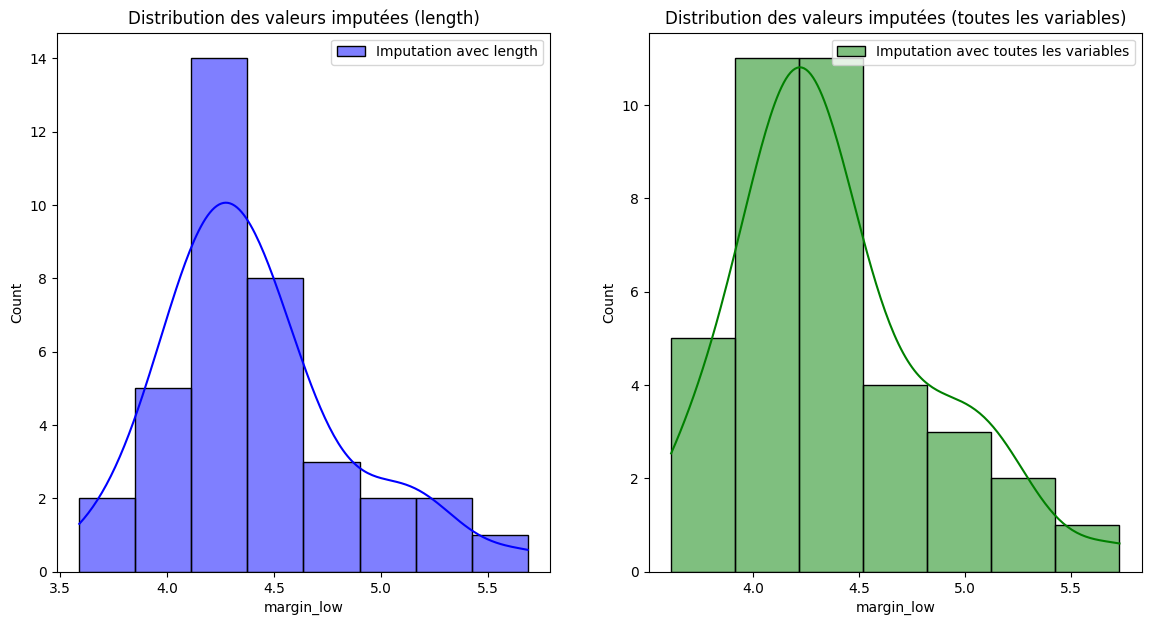

In [15]:
# Comparer les distributions des valeurs imputées
plt.figure(figsize=(14, 7))

# Distribution des valeurs imputées avec une seule variable
plt.subplot(1, 2, 1)
sns.histplot(imputed_values['margin_low'], kde=True, color='blue', label='Imputation avec length')
plt.title('Distribution des valeurs imputées (length)')
plt.xlabel('margin_low')
plt.legend()

# Distribution des valeurs imputées avec toutes les variables
plt.subplot(1, 2, 2)
sns.histplot(imputed_values_all_vars['margin_low'], kde=True, color='green', label='Imputation avec toutes les variables')
plt.title('Distribution des valeurs imputées (toutes les variables)')
plt.xlabel('margin_low')
plt.legend()

plt.show()

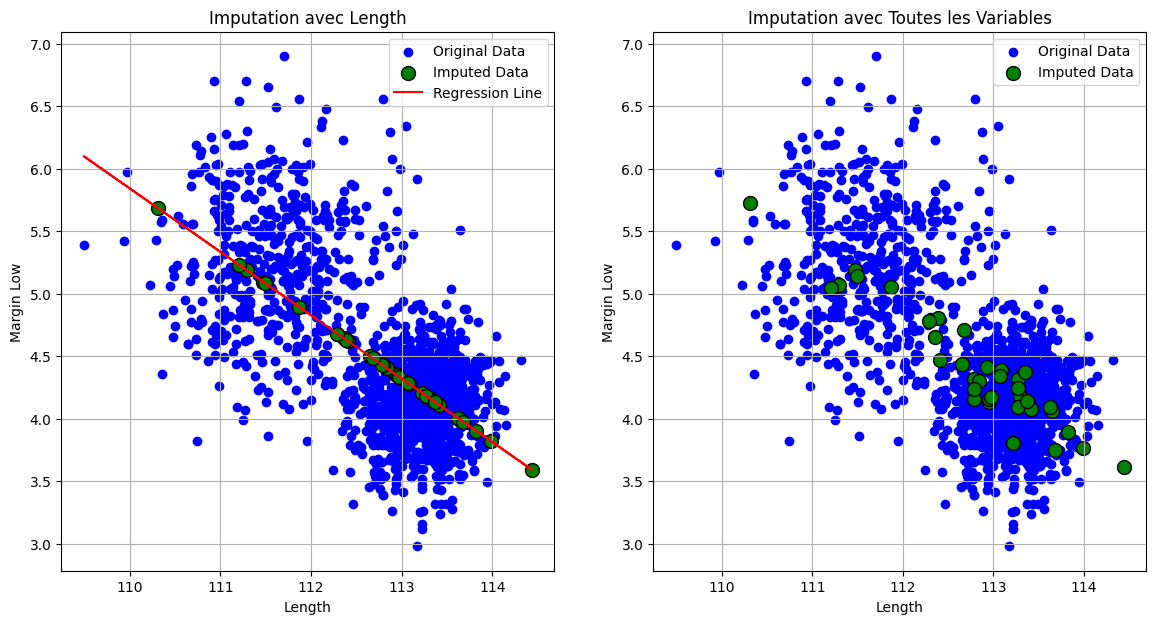

In [16]:


# Graphique de dispersion pour les imputations

# Traçage du graphique
plt.figure(figsize=(14, 7))

# Imputation avec length
plt.subplot(1, 2, 1)
plt.scatter(billets['length'], billets['margin_low'], color='blue', label='Original Data')
plt.scatter(missing_data['length'], missing_data['margin_low'], color='green', label='Imputed Data', s=100, edgecolor='black')  # Points imputés en vert avec bordure noire
plt.plot(billets['length'], model_single.predict(billets[['length']]), color='red', label='Regression Line')
plt.xlabel('Length')
plt.ylabel('Margin Low')
plt.title('Imputation avec Length')
plt.legend()
plt.grid(True)

# Imputation avec toutes les variables
plt.subplot(1, 2, 2)
plt.scatter(billets_all_vars['length'], billets_all_vars['margin_low'], color='blue', label='Original Data')
plt.scatter(imputed_values_all_vars['length'], imputed_values_all_vars['margin_low'], color='green', label='Imputed Data', s=100, edgecolor='black')  # Points imputés en vert avec bordure noire
plt.xlabel('Length')
plt.ylabel('Margin Low')
plt.title('Imputation avec Toutes les Variables')
plt.legend()
plt.grid(True)

plt.show()


### Selection de l'imputation

<h4 id="comparaison" style="border-left: 5px solid #0074CC; font-weight: bold; color: #0060A8; padding-left: 10px;">2.2.4 - Analyse de l'imputation</h4>
<hr style="border: 1px solid #0074CC;">

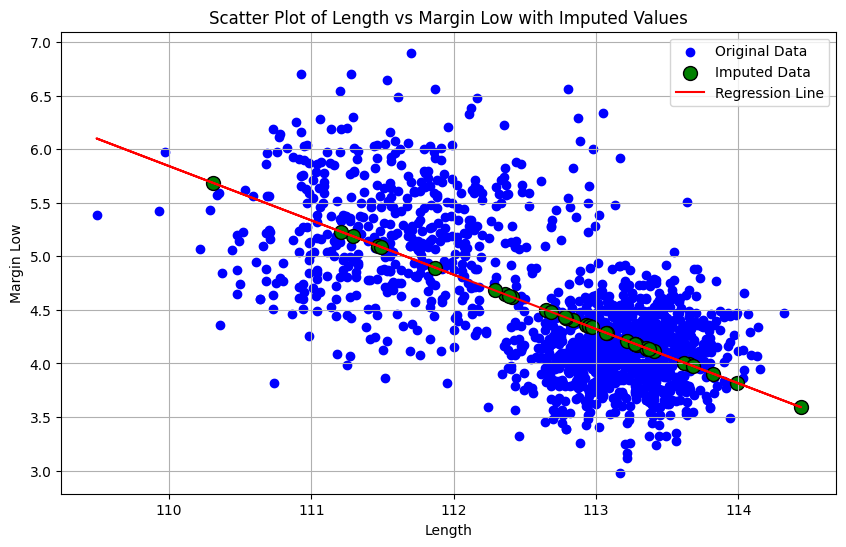

In [17]:
# Traçage du graphique avec fond transparent
fig, ax = plt.subplots(figsize=(10, 6), facecolor='none')
ax.scatter(billets['length'], billets['margin_low'], color='blue', label='Original Data')
ax.scatter(missing_data['length'], missing_data['margin_low'], color='green', label='Imputed Data', s=100, edgecolor='black')  # Points imputés en vert avec bordure noire
ax.plot(billets['length'], model_single.predict(billets[['length']]), color='red', label='Regression Line')
ax.set_xlabel('Length')
ax.set_ylabel('Margin Low')
ax.set_title('Scatter Plot of Length vs Margin Low with Imputed Values')
ax.legend()
ax.grid(True)

# Ajuster les paramètres pour fond transparent
fig.patch.set_alpha(0.0)
ax.patch.set_alpha(0.0)

plt.show()

<h4 id="boxplots" style=" font-weight: bold; color: #0060A8; padding-left: 10px;">Boxplots</h4>
<hr style="border: 1px solid #0074CC;">

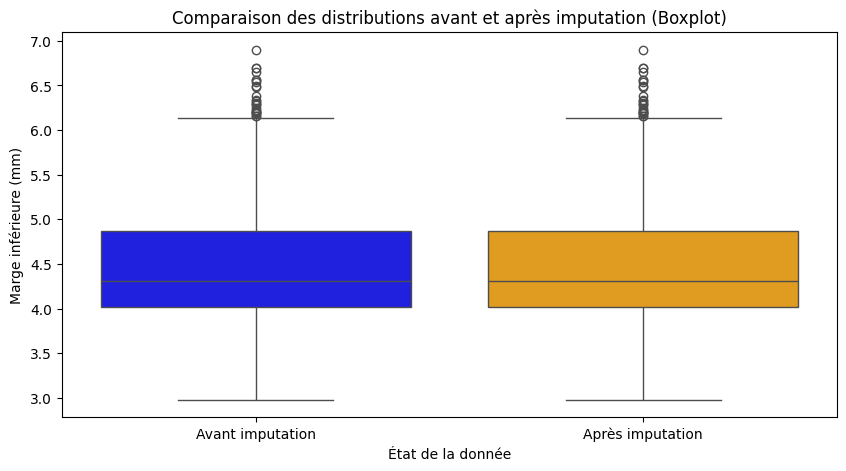

In [18]:
# Ajout d'une colonne pour l'état des données en utilisant .loc pour éviter l'avertissement
train_data = train_data.copy()
billets_copy = billets.copy()
train_data.loc[:, 'Etat'] = 'Avant imputation'
billets_copy.loc[:, 'Etat'] = 'Après imputation'

# Combinaison des deux DataFrames
df_combined = pd.concat([train_data, billets_copy], axis=0)

# Création du boxplot avec des couleurs différentes et suppression de la légende
plt.figure(figsize=(10, 5))
sns.boxplot(x='Etat', y='margin_low', data=df_combined, hue='Etat', palette={"Avant imputation": "blue", "Après imputation": "orange"})
plt.xlabel('État de la donnée')
plt.ylabel('Marge inférieure (mm)')
plt.title('Comparaison des distributions avant et après imputation (Boxplot)')
plt.legend([],[], frameon=False)  # Supprime la légende
plt.show()

### Analyse du boxplot

Les boxplots montrent que la distribution de margin_low reste similaire avant et après imputation. Les médianes et les quartiles sont cohérents, ce qui suggère que l'imputation n'a pas introduit de biais significatif.

<h2 style="color:red ; font-weight: bold">Conclusion de l'imputation </h2></span>

**Précision de l'Imputation :**

L'imputation des valeurs manquantes en utilisant la régression linéaire sur  `lenght` semble être précise et appropriée. Les valeurs imputées suivent la ligne de régression et s'alignent bien avec la tendance des données originales.

**Cohérence des Données :**

Les valeurs imputées ne se distinguent pas de manière significative des données originales, ce qui suggère que l'imputation n'a pas introduit de biais ou de variations anormales dans les données.

Le dataset est maintenant complet et prêt pour les étapes suivantes de l'analyse et de la modélisation.

<div id="acp" style="border-left: 5px solid #0074CC; padding-left: 10px;">
    <h3 style="font-weight: bold; color: #ED0010;">2.3 - ACP</h3>
</div>
<hr style="border: 1px solid #0074CC;">

<h4 id="acpapp" style="border-left: 5px solid #0074CC; font-weight: bold; color: #0060A8; padding-left: 10px;">2.3.1 - Application de l'ACP</h4>
<hr style="border: 1px solid #0074CC;">

<h4 id="standardisation" style=" font-weight: bold; color: #0060A8; padding-left: 10px;">Standardisation</h4>
<hr style="border: 1px solid #0074CC;">

In [19]:
billets.columns = billets.columns.map(str)
numeric_cols = billets.select_dtypes(include=[np.number])
scaler = StandardScaler()
billets_scaled = scaler.fit_transform(numeric_cols)
billets_scaled = pd.DataFrame(billets_scaled, columns=numeric_cols.columns)
names = billets.index
features = numeric_cols.columns

<h4 id="application" style=" font-weight: bold; color: #0060A8; padding-left: 10px;">Application de l'ACP</h4>
<hr style="border: 1px solid #0074CC;">

In [20]:
# Application de l'ACP
pca = PCA()
billets_pca = pca.fit_transform(billets_scaled)
scree = (pca.explained_variance_ratio_ * 100).round(2)
scree_cum = scree.cumsum().round()

<h4 id="eboulis" style=" font-weight: bold; color: #0060A8; padding-left: 10px;">Eboulis des valeurs propres</h4>
<hr style="border: 1px solid #0074CC;">

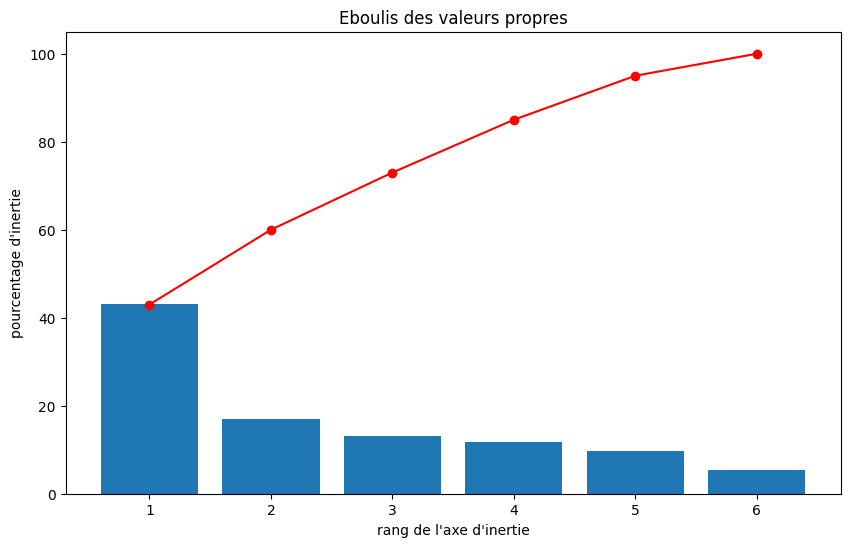

In [21]:
# Visualisation de l'Eboulis des Valeurs Propres
plt.figure(figsize=(10, 6))
billets_list = range(1, len(scree) + 1)
plt.bar(billets_list, scree)
plt.plot(billets_list, scree_cum, c="red", marker='o')
plt.xlabel("rang de l'axe d'inertie")
plt.ylabel("pourcentage d'inertie")
plt.title("Eboulis des valeurs propres")
plt.savefig('eboulis.png', bbox_inches='tight', dpi=300, transparent=True)
plt.show()

### Eboulis des valeurs propres

Le graphique montre le pourcentage d'inertie expliqué par chaque composante principale.
* La première composante (axe 1) explique environ 43% de la variance totale des données.
* Les deux premières composantes expliquent ensemble environ 60% de la variance.
* Les trois premières composantes expliquent environ 70% de la variance totale.

Cela suggère que la majorité de l'information des données peut être capturée par les premières composantes principales.

<h4 id="acpanalyse" style="border-left: 5px solid #0074CC; font-weight: bold; color: #0060A8; padding-left: 10px;">2.3.2 - Analyse de l'ACP</h4>
<hr style="border: 1px solid #0074CC;">

<h4 id="matrice" style=" font-weight: bold; color: #0060A8; padding-left: 10px;">Matrice des composantes principales</h4>
<hr style="border: 1px solid #0074CC;">

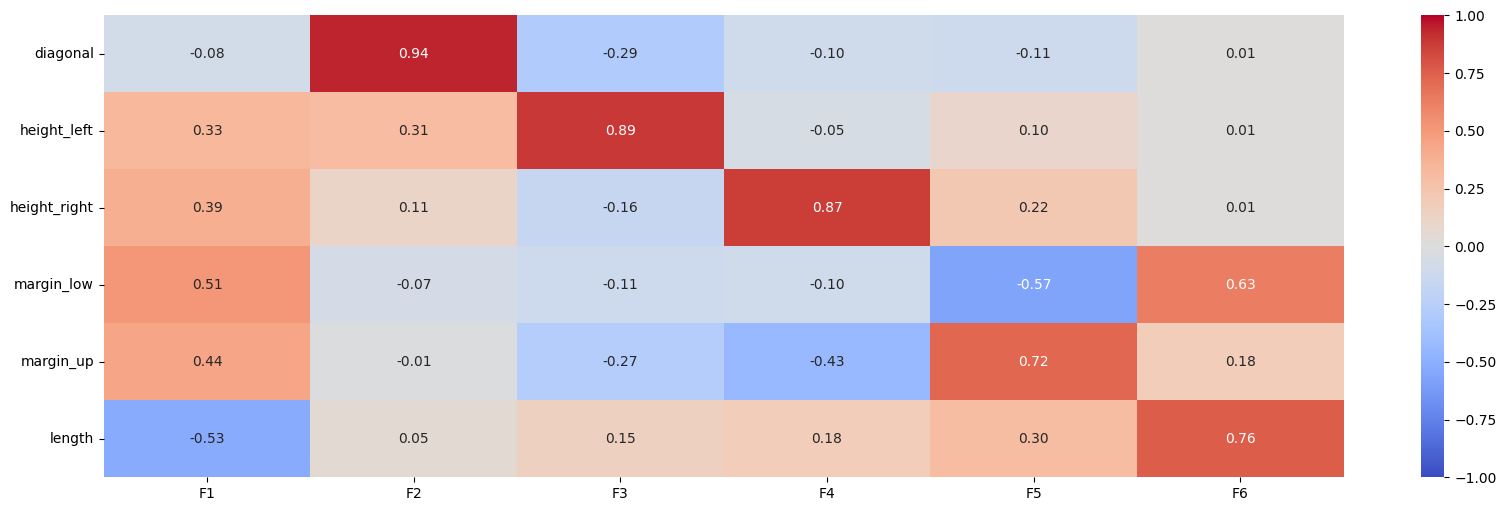

In [22]:
# Matrice des composantes principales
pcs = pd.DataFrame(pca.components_, columns=features, index=[f"F{i+1}" for i in range(len(features))]).round(2)
fig, ax = plt.subplots(figsize=(20, 6))
heatmap = sns.heatmap(pcs.T, vmin=-1, vmax=1, annot=True, cmap="coolwarm", fmt=".2f")
plt.savefig('matrice.png', bbox_inches='tight', dpi=300, transparent=True)
plt.show()

### Cercles de corrélation

La matrice de corrélation montre les coefficients de corrélation entre les variables originales et les composantes principales.

* diagonal a une forte corrélation positive avec F2.
* height_left et height_right montrent une forte corrélation avec F1.
* length est fortement corrélé avec F6.
* margin_low et margin_up ont des corrélations modérées avec plusieurs composantes, indiquant qu'elles contribuent à diverses dimensions.

<h4 id="cercle" style=" font-weight: bold; color: #0060A8; padding-left: 10px;">Cercles de correlation</h4>
<hr style="border: 1px solid #0074CC;">

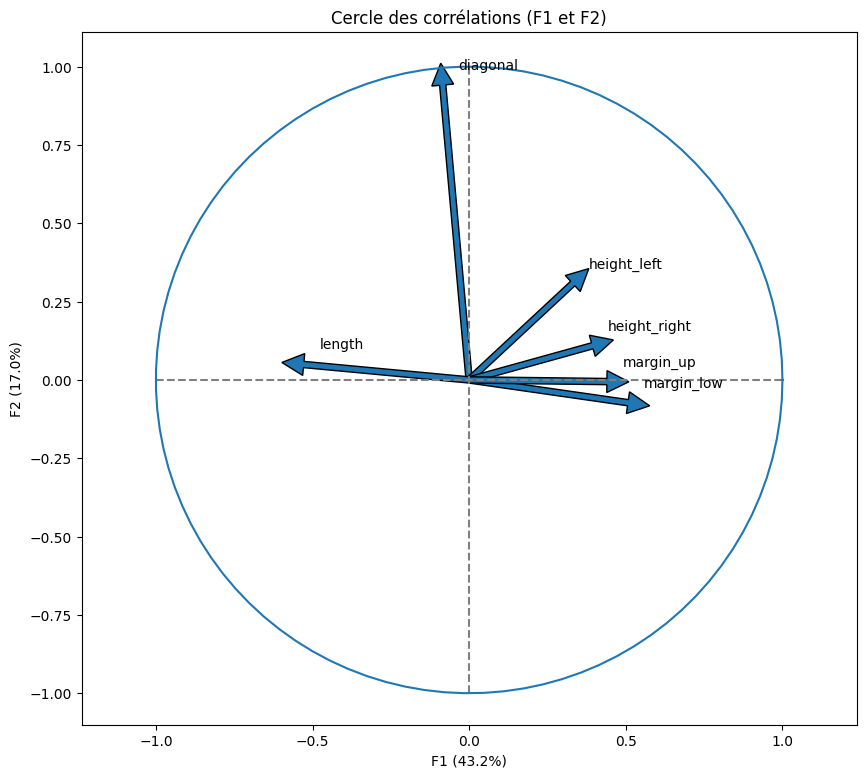

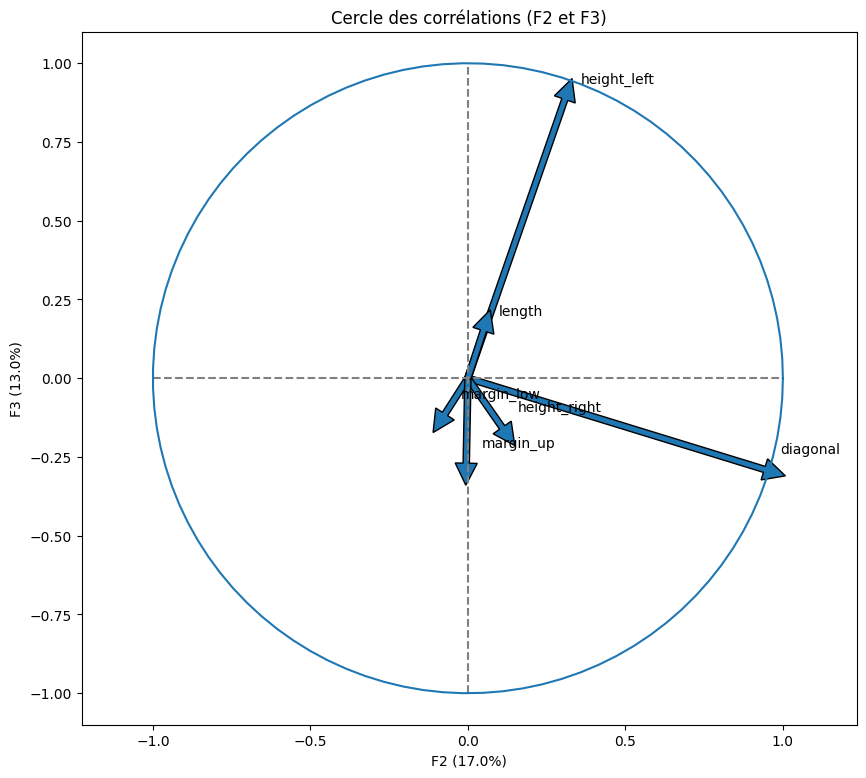

In [23]:
def correlation_graph(pca, x_y, features):
    x, y = x_y
    fig, ax = plt.subplots(figsize=(10, 9))

    for i in range(0, pca.components_.shape[1]):
        ax.arrow(0, 0, pca.components_[x, i], pca.components_[y, i], head_width=0.07, head_length=0.07, width=0.02)
        plt.text(pca.components_[x, i] + 0.05, pca.components_[y, i] + 0.05, features[i])

    plt.plot([-1, 1], [0, 0], color='grey', ls='--')
    plt.plot([0, 0], [-1, 1], color='grey', ls='--')
    plt.xlabel(f'F{x+1} ({round(100*pca.explained_variance_ratio_[x], 1)}%)')
    plt.ylabel(f'F{y+1} ({round(100*pca.explained_variance_ratio_[y], 1)}%)')
    plt.title(f"Cercle des corrélations (F{x+1} et F{y+1})")
    an = np.linspace(0, 2 * np.pi, 100)
    plt.plot(np.cos(an), np.sin(an))  # Add a unit circle for scale
    plt.axis('equal')
    plt.savefig('cerclecorrelation.png', bbox_inches='tight', dpi=300)
    plt.show()

# Cercle des corrélations F1 et F2
correlation_graph(pca, (0, 1), features)

# Cercle des corrélations F2 et F3
correlation_graph(pca, (1, 2), features)

### Cercles de corrélation

#### Cercle des corrélations (F1 et F2)

* La variable diagonal est fortement corrélée avec F1, indiquant qu'elle contribue significativement à la première composante principale.
* La variable length est opposée à diagonal sur F1, ce qui signifie qu'elle est négativement corrélée avec diagonal.
* Les variables `height_left` et `height_right` sont également bien représentées sur F2.
* `margin_low` et `margin_up`sont proches l'une de l'autre, suggérant qu'elles peuvent avoir une relation similaire avec les composantes principales.

`

#### Cercle des corrélations (F2 et F3)

* `height_left` et `lenght` sont bien représentés sur F2, tandis que diagonal est bien représenté sur F3.
* `margin_low`, `height_right`, et `margin_up` sont concentrés autour du centre, indiquant qu'ils ont une contribution modérée à F2 et F3.
* La variabilité expliquée par F3 est moindre comparée à F1 et F2, mais elle aide à comprendre des aspects spécifiques des données non capturés par F1 et F2.

<h4 id="projection" style=" font-weight: bold; color: #0060A8; padding-left: 10px;">Projection des individus</h4>
<hr style="border: 1px solid #0074CC;">

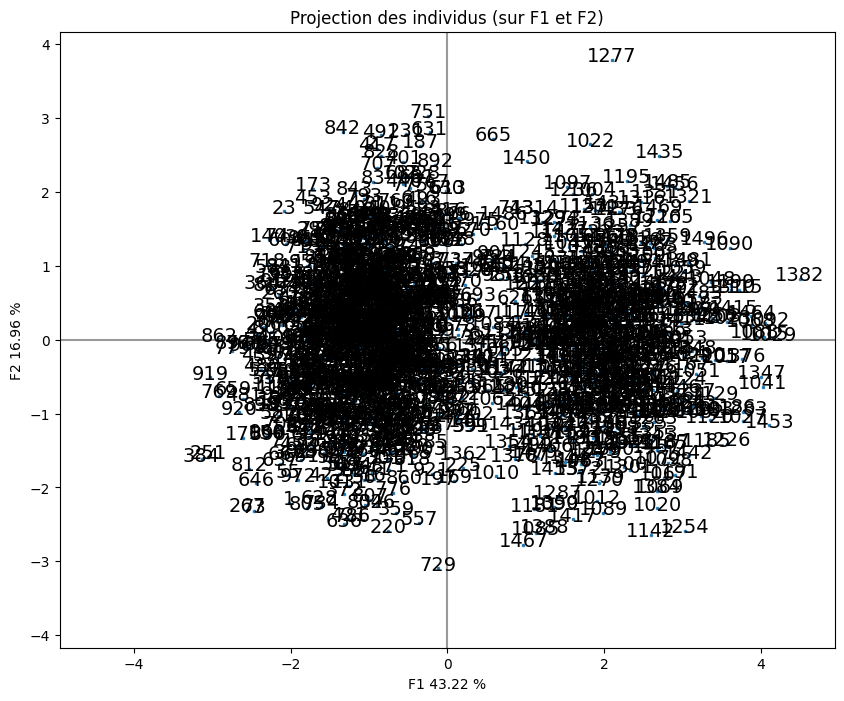

In [24]:
# Fonction pour afficher la projection des individus
def display_factorial_planes(X_projected, x_y, pca=None, labels=None, clusters=None, alpha=1, figsize=[10, 8], marker="."):
    X_ = np.array(X_projected)
    if not figsize:
        figsize = (7, 6)
    if labels is None:
        labels = []
    if not len(x_y) == 2:
        raise AttributeError("2 axes sont demandées")
    if max(x_y) >= X_.shape[1]:
        raise AttributeError("la variable axis n'est pas bonne")
    x, y = x_y
    fig, ax = plt.subplots(1, 1, figsize=figsize)
    c = None if clusters is None else clusters
    sns.scatterplot(x=X_[:, x], y=X_[:, y], hue=c, alpha=alpha, marker=marker)
    v1 = v2 = ''
    if pca:
        v1 = str(round(100 * pca.explained_variance_ratio_[x], 2)) + " %"
        v2 = str(round(100 * pca.explained_variance_ratio_[y], 2)) + " %"
    ax.set_xlabel(f'F{x+1} {v1}')
    ax.set_ylabel(f'F{y+1} {v2}')
    x_max = np.abs(X_[:, x]).max() * 1.1
    y_max = np.abs(X_[:, y]).max() * 1.1
    ax.set_xlim(-x_max, x_max)
    ax.set_ylim(-y_max, y_max)
    plt.axhline(0, color='grey', alpha=0.8)
    plt.axvline(0, color='grey', alpha=0.8)
    if labels:
        for i, (_x, _y) in enumerate(X_[:, [x, y]]):
            plt.text(_x, _y + 0.05, labels[i], fontsize='14', ha='center', va='center')
    plt.title(f"Projection des individus (sur F{x+1} et F{y+1})")
    plt.savefig('projectionindividus.png', bbox_inches='tight', dpi=300)
    plt.show()

# Projection des individus sur F1 et F2
display_factorial_planes(X_projected=billets_pca, x_y=[0, 1], pca=pca, labels=billets.index.tolist())

### Projection des individus

Les points sont dispersés, montrant la variabilité des données.
Il y a une séparation visible entre certains groupes, suggérant la présence de structures sous-jacentes dans les données.
Les observations dispersées autour du centre indiquent des individus moyens, tandis que les observations éloignées du centre sont plus extrêmes par rapport aux composantes principales.

<h2 style="color:red ; font-weight: bold">Conclusion de l'ACP </h2></span>

* Inertie et Variance : Les premières composantes principales capturent une grande partie de la variance totale des données.
* Corrélations : Les variables diagonal, `height_left`, et `height_right` ont une forte influence sur les premières composantes principales.
* Projection des individus : La dispersion des individus sur les composantes principales indique une variabilité et la possible présence de groupes distincts.

<div id="preparation" style="border: 2px solid #001F3F; background-color: #77B5FE; padding: 10px; text-align: center;">
    <h2 style="font-weight: bold; color: #001F3F;">Étape 3 - Préparation des Modèles de Prédiction</h2>
</div>

Nous allons mettre en concurrence deux méthodes de prédiction pour identifier les faux billets :

* Une régression logistique classique
* Un K-means, en utilisant les centroïdes pour réaliser la prédiction

L'objectif est de maximiser la performance de l'algorithme pour identifier un maximum de faux billets. Nous évaluerons les modèles à l'aide de matrices de confusion pour analyser les faux positifs et les faux négatifs.

<div id="preparationdonnees" style="border-left: 5px solid #0074CC; padding-left: 10px;">
    <h3 style="font-weight: bold; color: #ED0010;">3.1 - Préparation des Données</h3>
</div>
<hr style="border: 1px solid #0074CC;">

In [25]:
# Remplacer les valeurs de 'is_genuine' pour plus de lisibilité
billets['is_genuine'] = billets['is_genuine'].replace({True: 'Vrai Billet', False: 'Faux Billet'})

# Sélectionner les colonnes numériques pour le clustering
numeric_cols = billets.select_dtypes(include=[np.number])

# Appliquer StandardScaler
scaler = StandardScaler()
billets_scaled = scaler.fit_transform(numeric_cols)

# Appliquer QuantileTransformer à toutes les colonnes
quantile_transformer = QuantileTransformer(n_quantiles=100, output_distribution='uniform')
billets_quantile_scaled = quantile_transformer.fit_transform(billets_scaled)

# Créer un DataFrame avec les données transformées
billets_quantile_scaled_df = pd.DataFrame(billets_quantile_scaled, columns=numeric_cols.columns)

# Diviser les données en 80 % pour l'entraînement et 20 % pour le test
train_data, test_data, train_labels, test_labels = train_test_split(billets_quantile_scaled_df, billets['is_genuine'], test_size=0.2, random_state=42)

# Clustering par K-means

<div id="kmeans" style="border-left: 5px solid #0074CC; padding-left: 10px;">
    <h3 style="font-weight: bold; color: #ED0010;">3.2 - K-means</h3>
</div>
<hr style="border: 1px solid #0074CC;">

<h4 id="kmeansentrainement" style="border-left: 5px solid #0074CC; font-weight: bold; color: #0060A8; padding-left: 10px;">3.2.1 - Entraînement du modèle K-means</h4>
<hr style="border: 1px solid #0074CC;">

In [26]:
# Clustering par K-means
n_clust = 2
km = KMeans(n_clusters=n_clust, random_state=42, n_init=10)
km.fit(train_data)

# Ajout des clusters au DataFrame d'entraînement
train_data['Cluster'] = km.labels_

# Matrice de confusion pour les données d'entraînement
train_cluster_summary = pd.crosstab(train_data['Cluster'], train_labels)
print("Nombre de vrais et faux billets par cluster dans les données d'entraînement :")
print(train_cluster_summary)

# Déterminer quel cluster correspond aux faux billets
if train_cluster_summary.iloc[0]['Faux Billet'] > train_cluster_summary.iloc[1]['Faux Billet']:
    false_billet_cluster = 0
    true_billet_cluster = 1
else:
    false_billet_cluster = 1
    true_billet_cluster = 0

# Réajuster les clusters dans les données d'entraînement
train_data['Cluster'] = train_data['Cluster'].apply(lambda x: 'Faux Billet' if x == false_billet_cluster else 'Vrai Billet')

Nombre de vrais et faux billets par cluster dans les données d'entraînement :
is_genuine  Faux Billet  Vrai Billet
Cluster                             
0                   382           27
1                     8          783


/Users/Bouboule/anaconda3/lib/python3.11/site-packages/sklearn/base.py:464: UserWarning:

X does not have valid feature names, but PCA was fitted with feature names



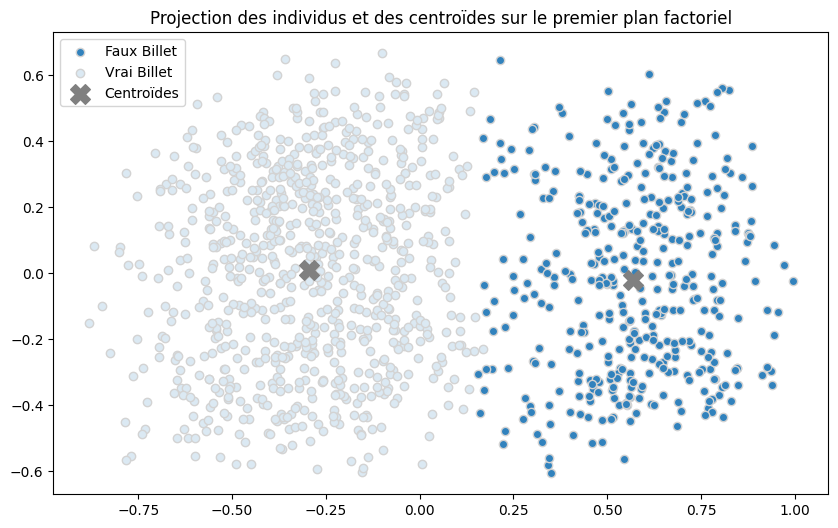

In [27]:
# Visualisation des clusters avec fond transparent
pca = PCA(n_components=2)
pca_result = pca.fit_transform(train_data.drop(columns=['Cluster']))

centroids = km.cluster_centers_
centroids_pca = pca.transform(centroids)

fig, ax = plt.subplots(figsize=(10, 6), facecolor='none')
colors = ['#3182bd', '#dbe9f3']

for color, label in zip(colors, ['Faux Billet', 'Vrai Billet']):
    ax.scatter(pca_result[train_data['Cluster'] == label, 0], pca_result[train_data['Cluster'] == label, 1], c=color, edgecolors="#D3D3D3", label=f"{label}")

ax.scatter(centroids_pca[:, 0], centroids_pca[:, 1], s=200, c='grey', label='Centroïdes', marker='X')
ax.set_title("Projection des individus et des centroïdes sur le premier plan factoriel")
ax.legend()

# Ajuster les paramètres pour fond transparent
fig.patch.set_alpha(0.0)
ax.patch.set_alpha(0.0)

plt.show()

### Clusters de billets avec Centroïdes (PCA)

Ce graphique montre les clusters formés par le modèle KMeans sur les données d'entraînement, projetés sur deux composantes principales après une analyse en composantes principales (PCA).
* Les points bleus clairs et bleus représentent les billets regroupés dans deux clusters distincts.
* Les grands points "X" indiquent les centroïdes des clusters. 

Le graphique montre une bonne séparation entre les deux clusters, ce qui suggère que le modèle KMeans a pu identifier des caractéristiques distinctes entre les vrais et faux billets.

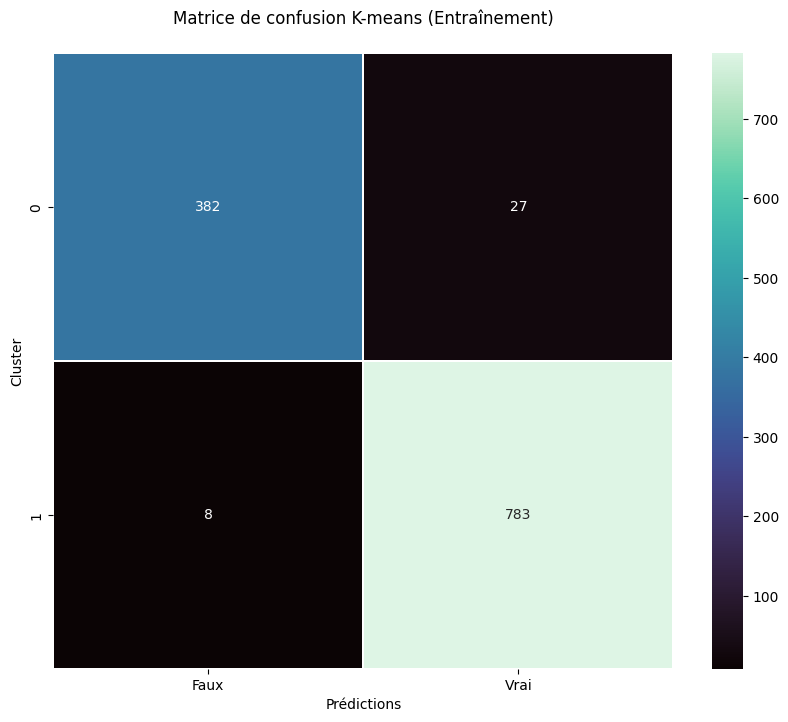

In [28]:

# Création de la heatmap avec un fond transparent
fig, ax = plt.subplots(figsize=(10, 8), facecolor='none')

sns.heatmap(train_cluster_summary, annot=True, fmt=".3g", cmap=sns.color_palette("mako", as_cmap=True), 
            linecolor="white", linewidths=0.3, xticklabels=["Faux", "Vrai"], yticklabels=["0", "1"], ax=ax)

ax.set_xlabel("Prédictions")
ax.set_ylabel("Cluster")
ax.set_title("Matrice de confusion K-means (Entraînement)\n")

# Ajuster les paramètres pour fond transparent
fig.patch.set_alpha(0.0)
ax.patch.set_alpha(0.0)

plt.show()

### Nombre de vrais et faux billets par cluster

Le graphique à barres montre la répartition des vrais et faux billets dans les deux clusters identifiés par le modèle. 
* Le cluster 0 contient principalement des faux billets avec quelques vrais billets
*  le cluster 1 contient principalement des vrais billets avec très peu de faux billets. 

Cela indique que le modèle a bien séparé les vrais et faux billets, bien que quelques erreurs subsistent.

<h4 id="kmeanstest" style="border-left: 5px solid #0074CC; font-weight: bold; color: #0060A8; padding-left: 10px;">3.2.2 - Test du modèle K-means</h4>
<hr style="border: 1px solid #0074CC;">


Nombre de vrais et faux billets par cluster dans les données de test après ajustement :
is_genuine   Faux Billet  Vrai Billet
Cluster                              
Faux Billet          109            3
Vrai Billet            1          187


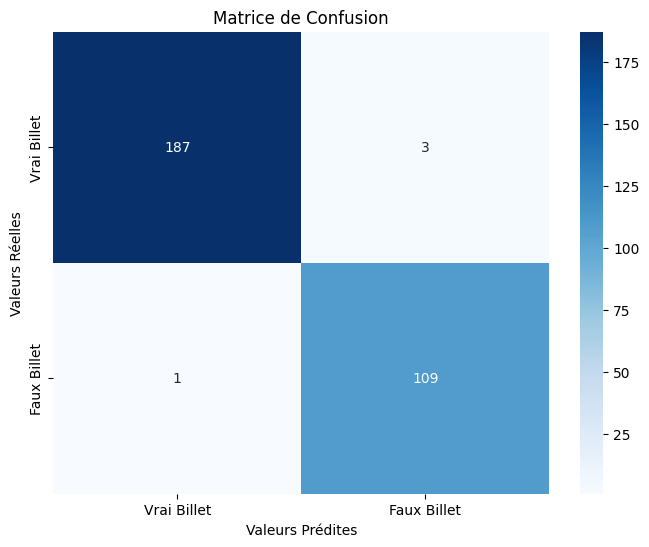

In [29]:
# Prédire les clusters pour les données de test
test_data_for_prediction = test_data.copy()
test_data_for_prediction['Cluster'] = km.predict(test_data_for_prediction[numeric_cols.columns])

# Ajouter les labels 'is_genuine' pour les données de test
test_data_for_prediction['is_genuine'] = test_labels.values

# Réajuster les clusters dans les données de test
test_data_for_prediction['Cluster'] = test_data_for_prediction['Cluster'].apply(lambda x: 'Faux Billet' if x == false_billet_cluster else 'Vrai Billet')

# Matrice de confusion pour les données de test après ajustement
test_cluster_summary = pd.crosstab(test_data_for_prediction['Cluster'], test_data_for_prediction['is_genuine'])
print("\nNombre de vrais et faux billets par cluster dans les données de test après ajustement :")
print(test_cluster_summary)

# Définir y_true et y_pred pour la matrice de confusion
y_true = test_data_for_prediction['is_genuine']
y_pred = test_data_for_prediction['Cluster']

# Générer la matrice de confusion
conf_matrix = confusion_matrix(y_true, y_pred, labels=['Vrai Billet', 'Faux Billet'])

# Affichage de la matrice de confusion avec fond transparent
fig, ax = plt.subplots(figsize=(8, 6), facecolor='none')
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Vrai Billet', 'Faux Billet'], yticklabels=['Vrai Billet', 'Faux Billet'], ax=ax)

ax.set_xlabel('Valeurs Prédites')
ax.set_ylabel('Valeurs Réelles')
ax.set_title('Matrice de Confusion')

# Ajuster les paramètres pour fond transparent
fig.patch.set_alpha(0.0)
ax.patch.set_alpha(0.0)

plt.show()

<h4 id="analysekmeans" style="border-left: 5px solid #0074CC; font-weight: bold; color: #0060A8; padding-left: 10px;">3.2.3 - Test du modèle K-means : Analyse des résultats</h4>
<hr style="border: 1px solid #0074CC;">

In [30]:
# Générer le rapport de classification
class_report = classification_report(y_true, y_pred, target_names=['Vrai Billet', 'Faux Billet'])
print("\nRapport de classification :")
print(class_report)

# Calculer la précision et le rappel
accuracy = accuracy_score(y_true, y_pred)
precision = precision_score(y_true, y_pred, pos_label='Vrai Billet')
recall = recall_score(y_true, y_pred, pos_label='Vrai Billet')

print(f"Précision : {precision:.2f}")
print(f"Rappel : {recall:.2f}")
print(f"Exactitude : {accuracy:.2f}")


Rapport de classification :
              precision    recall  f1-score   support

 Vrai Billet       0.97      0.99      0.98       110
 Faux Billet       0.99      0.98      0.99       190

    accuracy                           0.99       300
   macro avg       0.98      0.99      0.99       300
weighted avg       0.99      0.99      0.99       300

Précision : 0.99
Rappel : 0.98
Exactitude : 0.99


### Analyse des données de test du K-means

#### Graphique 1 : Matrice de Confusion
La matrice de confusion pour les données de test après ajustement montre la répartition suivante :

Le cluster étiqueté "Faux Billet" contient 109 faux billets et 3 vrais billets.
Le cluster étiqueté "Vrai Billet" contient 1 faux billet et 187 vrais billets.
Cette distribution indique que le modèle K-means a très bien séparé les vrais et faux billets, avec seulement 4 erreurs au total sur les 300 exemples de test.

#### Rapport de classification
Le rapport de classification fournit des métriques de performance détaillées :

* Vrai Billet : 
Précision : 0.97
Rappel : 0.99
F1-score : 0.98
* Faux Billet :
Précision : 0.99
Rappel : 0.98
F1-score : 0.99

L'exactitude globale est de 0.99, ce qui indique que 99% des prédictions du modèle sont correctes. La précision et le rappel sont également très élevés pour les deux classes, avec des valeurs proches de 1.00, montrant que le modèle a une très faible proportion de faux positifs et de faux négatifs.

<h2 style="color:red ; font-weight: bold">Conclusion de du Kmeans </h2></span>

Le modèle K-means a démontré une excellente performance sur les données de test, avec une très haute exactitude (0.99), précision (0.99), et rappel (0.98). La matrice de confusion et le rapport de classification indiquent que le modèle a efficacement distingué entre les vrais et faux billets, avec seulement 4 erreurs sur 300 exemples.

Ces résultats suggèrent que le modèle K-means est très capable de séparer les vrais et faux billets dans ce jeu de données, offrant une solution robuste pour la détection de faux billets.

<div id="regressionlogistique" style="border-left: 5px solid #0074CC; padding-left: 10px;">
    <h3 style="font-weight: bold; color: #ED0010;">3.3 - Régression Logistique</h3>
</div>
<hr style="border: 1px solid #0074CC;">

<h4 id="regentrainement" style="border-left: 5px solid #0074CC; font-weight: bold; color: #0060A8; padding-left: 10px;">3.3.1 - Entraînement du modèle de Régression logistique</h4>
<hr style="border: 1px solid #0074CC;">

In [31]:
# Remplacer les valeurs de 'is_genuine' pour plus de lisibilité
billets['is_genuine'] = billets['is_genuine'].replace({True: 'Vrai Billet', False: 'Faux Billet'})

# Sélectionner les colonnes numériques pour la transformation
numeric_cols = billets.select_dtypes(include=[np.number])

# Appliquer StandardScaler
scaler = StandardScaler()
billets_scaled = scaler.fit_transform(numeric_cols)

# Appliquer QuantileTransformer à toutes les colonnes
quantile_transformer = QuantileTransformer(n_quantiles=100, output_distribution='uniform')
billets_quantile_scaled = quantile_transformer.fit_transform(billets_scaled)

# Créer un DataFrame avec les données transformées
billets_quantile_scaled_df = pd.DataFrame(billets_quantile_scaled, columns=numeric_cols.columns)

# Diviser les données en 80 % pour l'entraînement et 20 % pour le test
train_data, test_data, train_labels, test_labels = train_test_split(
    billets_quantile_scaled_df, billets['is_genuine'], test_size=0.2, random_state=42)


Matrice de confusion (Entraînement) :
[[377  13]
 [  8 802]]


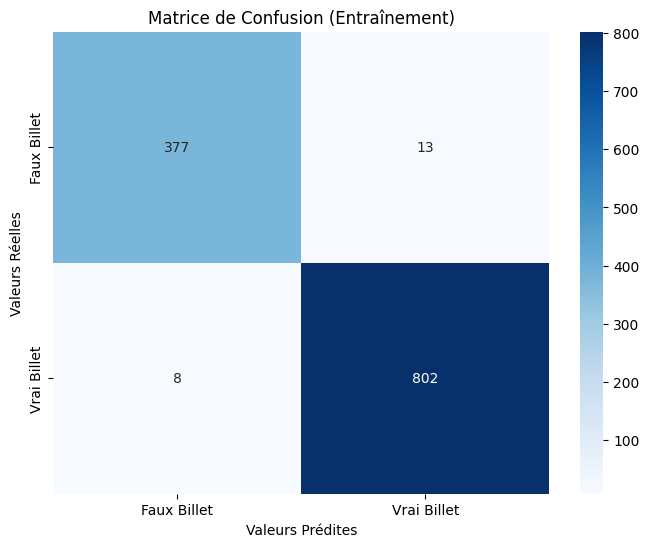

Précision (Entraînement) : 0.98
Rappel (Entraînement) : 0.99
Exactitude (Entraînement) : 0.98


In [32]:
# Entraînement du modèle de régression logistique
log_reg = LogisticRegression(random_state=42)
log_reg.fit(train_data, train_labels)

# Prédictions sur les données d'entraînement
train_predictions = log_reg.predict(train_data)

# Matrice de confusion pour les données d'entraînement
train_conf_matrix = confusion_matrix(train_labels, train_predictions)
print("Matrice de confusion (Entraînement) :")
print(train_conf_matrix)

fig, ax = plt.subplots(figsize=(8, 6), facecolor='none')

sns.heatmap(train_conf_matrix, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['Faux Billet', 'Vrai Billet'], yticklabels=['Faux Billet', 'Vrai Billet'], ax=ax)

ax.set_xlabel('Valeurs Prédites')
ax.set_ylabel('Valeurs Réelles')
ax.set_title('Matrice de Confusion (Entraînement)')

# Ajuster les paramètres pour fond transparent
fig.patch.set_alpha(0.0)
ax.patch.set_alpha(0.0)

plt.show()

# Calculer la précision, le rappel et l'exactitude pour les données d'entraînement
train_accuracy = accuracy_score(train_labels, train_predictions)
train_precision = precision_score(train_labels, train_predictions, pos_label='Vrai Billet')
train_recall = recall_score(train_labels, train_predictions, pos_label='Vrai Billet')

print(f"Précision (Entraînement) : {train_precision:.2f}")
print(f"Rappel (Entraînement) : {train_recall:.2f}")
print(f"Exactitude (Entraînement) : {train_accuracy:.2f}")


<h4 id="regtest" style="border-left: 5px solid #0074CC; font-weight: bold; color: #0060A8; padding-left: 10px;">3.3.2 - Test du modèle de Régression logistique</h4>
<hr style="border: 1px solid #0074CC;">

In [33]:
# Prédictions sur les données de test
test_predictions = log_reg.predict(test_data)

# Matrice de confusion pour les données de test
test_conf_matrix = confusion_matrix(test_labels, test_predictions)

<h4 id="reganalyse" style="border-left: 5px solid #0074CC; font-weight: bold; color: #0060A8; padding-left: 10px;">3.3.3 - Test du modèle de Régression logistique : Analyse des résultats</h4>
<hr style="border: 1px solid #0074CC;">

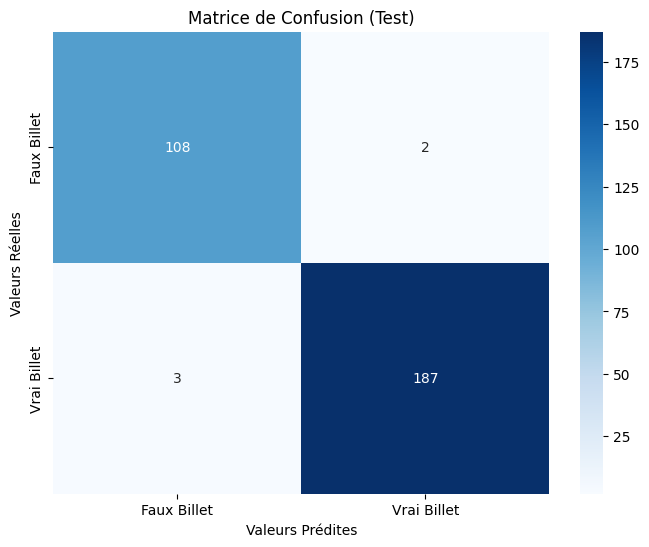

Précision (Test) : 0.99
Rappel (Test) : 0.98
Exactitude (Test) : 0.98

Rapport de classification :
              precision    recall  f1-score   support

 Faux Billet       0.97      0.98      0.98       110
 Vrai Billet       0.99      0.98      0.99       190

    accuracy                           0.98       300
   macro avg       0.98      0.98      0.98       300
weighted avg       0.98      0.98      0.98       300



In [34]:
# Création de la heatmap avec un fond transparent
fig, ax = plt.subplots(figsize=(8, 6), facecolor='none')

sns.heatmap(test_conf_matrix, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['Faux Billet', 'Vrai Billet'], yticklabels=['Faux Billet', 'Vrai Billet'], ax=ax)

ax.set_xlabel('Valeurs Prédites')
ax.set_ylabel('Valeurs Réelles')
ax.set_title('Matrice de Confusion (Test)')

# Ajuster les paramètres pour fond transparent
fig.patch.set_alpha(0.0)
ax.patch.set_alpha(0.0)

plt.show()

# Calculer la précision, le rappel et l'exactitude pour les données de test
test_accuracy = accuracy_score(test_labels, test_predictions)
test_precision = precision_score(test_labels, test_predictions, pos_label='Vrai Billet')
test_recall = recall_score(test_labels, test_predictions, pos_label='Vrai Billet')

print(f"Précision (Test) : {test_precision:.2f}")
print(f"Rappel (Test) : {test_recall:.2f}")
print(f"Exactitude (Test) : {test_accuracy:.2f}")

# Générer le rapport de classification
class_report = classification_report(test_labels, test_predictions, target_names=['Faux Billet', 'Vrai Billet'])
print("\nRapport de classification :")
print(class_report)



### Analyse des données de la régression logistique

#### Graphique 1 : Matrice de Confusion
La matrice de confusion pour les données de test montre la répartition suivante :

* Faux Billets : 97% de précision et 98% de rappel, indiquant une capacité élevée à identifier correctement les faux billets.
* Vrais Billets : 99% de précision et 98% de rappel, démontrant une capacité similaire à détecter correctement les vrais billets.


#### Rapport de classification
Le rapport de classification fournit des métriques de performance détaillées :

* Faux Billet :
    * Précision : 0.97
    * Rappel : 0.98
    * F1-score : 0.98
    * Support : 110
* Vrai Billet :
    * Précision : 0.99
    * Rappel : 0.98
    * F1-score : 0.99
    * Support : 190

L'exactitude globale est de 0.98, ce qui indique que 98% des prédictions du modèle sont correctes. La précision et le rappel sont également très élevés pour les deux classes, avec des valeurs proches de 1.00, montrant que le modèle a une très faible proportion de faux positifs et de faux négatifs.


Coefficients de la régression logistique :
              Coefficient
length           6.606806
diagonal         0.509474
height_left     -1.661880
height_right    -2.170565
margin_up       -3.605958
margin_low      -5.169229


/var/folders/mj/35lwrtk904vb1m5rkhflm60w0000gp/T/ipykernel_86123/1569009005.py:14: UserWarning:

set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.



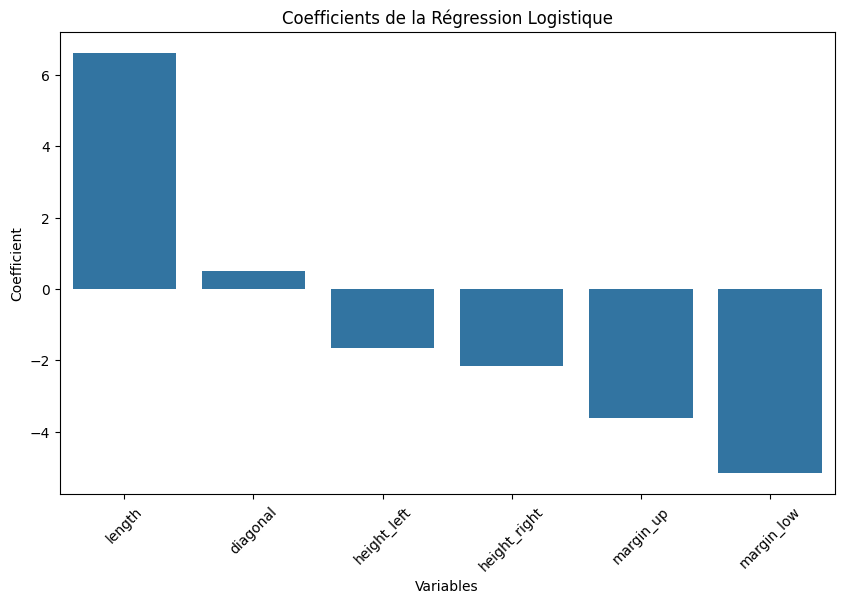

In [35]:
# Interprétation des coefficients de la régression logistique
coefficients = pd.DataFrame(log_reg.coef_[0], index=train_data.columns, columns=['Coefficient'])
coefficients = coefficients.sort_values(by='Coefficient', ascending=False)
print("\nCoefficients de la régression logistique :")
print(coefficients)

# Création du graphique avec un fond transparent
fig, ax = plt.subplots(figsize=(10, 6), facecolor='none')

sns.barplot(x=coefficients.index, y=coefficients['Coefficient'], ax=ax)
ax.set_xlabel('Variables')
ax.set_ylabel('Coefficient')
ax.set_title('Coefficients de la Régression Logistique')
ax.set_xticklabels(ax.get_xticklabels(), rotation=45)

# Ajuster les paramètres pour fond transparent
fig.patch.set_alpha(0.0)
ax.patch.set_alpha(0.0)

plt.show()


<h2 style="color:red ; font-weight: bold">Conclusion de la mise en concurrence deux méthodes de prédiction</h2></span>

En comparant les deux méthodes, la régression logistique offre une performance légèrement meilleure que le K-means en termes de réduction des faux négatifs, ce qui est crucial pour l'identification des faux billets. Bien que les deux modèles affichent des performances élevées, la régression logistique est légèrement plus fiable pour ce cas d'utilisation spécifique. Les résultats suggèrent que, malgré les bonnes performances de K-means, la régression logistique pourrait être privilégiée pour son efficacité marginalement supérieure dans la différenciation des vrais et faux billets.

<div id="evaluation" style="border: 2px solid #001F3F; background-color: #77B5FE; padding: 10px; text-align: center;">
    <h2 style="font-weight: bold; color: #001F3F;">Étape 4 - Évaluation des Modèles</h2>
</div>

<div id="entrainement" style="border-left: 5px solid #0074CC; padding-left: 10px;">
    <h3 style="font-weight: bold; color: #ED0010;">4.1 - Entraînement et sauvegarde</h3>
</div>
<hr style="border: 1px solid #0074CC;">

In [36]:
# Remplacer les valeurs de 'is_genuine' pour plus de lisibilité
billets['is_genuine'] = billets['is_genuine'].replace({True: 'Vrai Billet', False: 'Faux Billet'})

# Sélectionner les colonnes numériques pour la transformation
numeric_cols = billets.select_dtypes(include=[np.number])

# Appliquer StandardScaler
scaler = StandardScaler()
billets_scaled = scaler.fit_transform(numeric_cols)

# Appliquer QuantileTransformer à toutes les colonnes
quantile_transformer = QuantileTransformer(n_quantiles=100, output_distribution='uniform')
billets_quantile_scaled = quantile_transformer.fit_transform(billets_scaled)

# Créer un DataFrame avec les données transformées
billets_quantile_scaled_df = pd.DataFrame(billets_quantile_scaled, columns=numeric_cols.columns)

# Diviser les données en 80 % pour l'entraînement et 20 % pour le test
train_data, test_data, train_labels, test_labels = train_test_split(
    billets_quantile_scaled_df, billets['is_genuine'], test_size=0.2, random_state=42)

# Entraînement du modèle de régression logistique
log_reg = LogisticRegression(random_state=42)
log_reg.fit(train_data, train_labels)

# Sauvegarder le modèle et les objets de prétraitement
with open('log_reg_model.pkl', 'wb') as model_file:
    pickle.dump(log_reg, model_file)

with open('scaler.pkl', 'wb') as scaler_file:
    pickle.dump(scaler, scaler_file)

with open('quantile_transformer.pkl', 'wb') as qt_file:
    pickle.dump(quantile_transformer, qt_file)

with open('numeric_cols.pkl', 'wb') as cols_file:
    pickle.dump(numeric_cols.columns, cols_file)

print("Modèle et objets de prétraitement sauvegardés.")

Modèle et objets de prétraitement sauvegardés.


<div id="chargement" style="border-left: 5px solid #0074CC; padding-left: 10px;">
    <h3 style="font-weight: bold; color: #ED0010;">4.2 - Chargement et prédiction</h3>
</div>
<hr style="border: 1px solid #0074CC;">

In [37]:
def predict_from_csv(csv_path):
    # Charger les objets sauvegardés
    with open('log_reg_model.pkl', 'rb') as model_file:
        log_reg = pickle.load(model_file)

    with open('scaler.pkl', 'rb') as scaler_file:
        scaler = pickle.load(scaler_file)

    with open('quantile_transformer.pkl', 'rb') as qt_file:
        quantile_transformer = pickle.load(qt_file)

    with open('numeric_cols.pkl', 'rb') as cols_file:
        numeric_cols = pickle.load(cols_file)

    # Charger les nouvelles données
    new_data = pd.read_csv(csv_path)

    # Sélectionner les colonnes numériques
    new_data_numeric = new_data[numeric_cols]

    # Traiter les valeurs manquantes
    new_data_numeric = new_data_numeric.fillna(new_data_numeric.mean())

    # Appliquer les mêmes transformations que les données d'entraînement
    new_data_scaled = scaler.transform(new_data_numeric)
    new_data_quantile_scaled = quantile_transformer.transform(new_data_scaled)

    # Faire les prédictions
    predictions = log_reg.predict(new_data_quantile_scaled)

    # Ajouter les prédictions au DataFrame original
    new_data['Prediction'] = predictions

    return new_data

# Exemple d'utilisation
predictions = predict_from_csv('/Users/Bouboule/Documents/Projet 10/billets_test (1).csv')
print(predictions)


   diagonal  height_left  height_right  margin_low  margin_up  length   id  \
0    172.09       103.95        103.73        4.39       3.09  113.19  B_1   
1    171.52       104.17        104.03        5.27       3.16  111.82  B_2   
2    171.78       103.80        103.75        3.81       3.24  113.39  B_3   
3    172.02       104.08        103.99        5.57       3.30  111.10  B_4   
4    171.79       104.34        104.37        5.00       3.07  111.87  B_5   

    Prediction  
0  Vrai Billet  
1  Faux Billet  
2  Vrai Billet  
3  Faux Billet  
4  Faux Billet  


/Users/Bouboule/anaconda3/lib/python3.11/site-packages/sklearn/base.py:464: UserWarning:

X does not have valid feature names, but LogisticRegression was fitted with feature names

